In [19]:
library(forecast)

#### Contenido

* [Ventanas de 4 años](##Ventanas-de-4-años)
* [Ventanas de 8 años](##Ventanas-de-8-años)
* [Ventanas de 12 años](##Ventanas-de-12-años)
* [Ventanas de 15 años](##Ventanas-de-15-años)
* [Resultados](#Resultados)

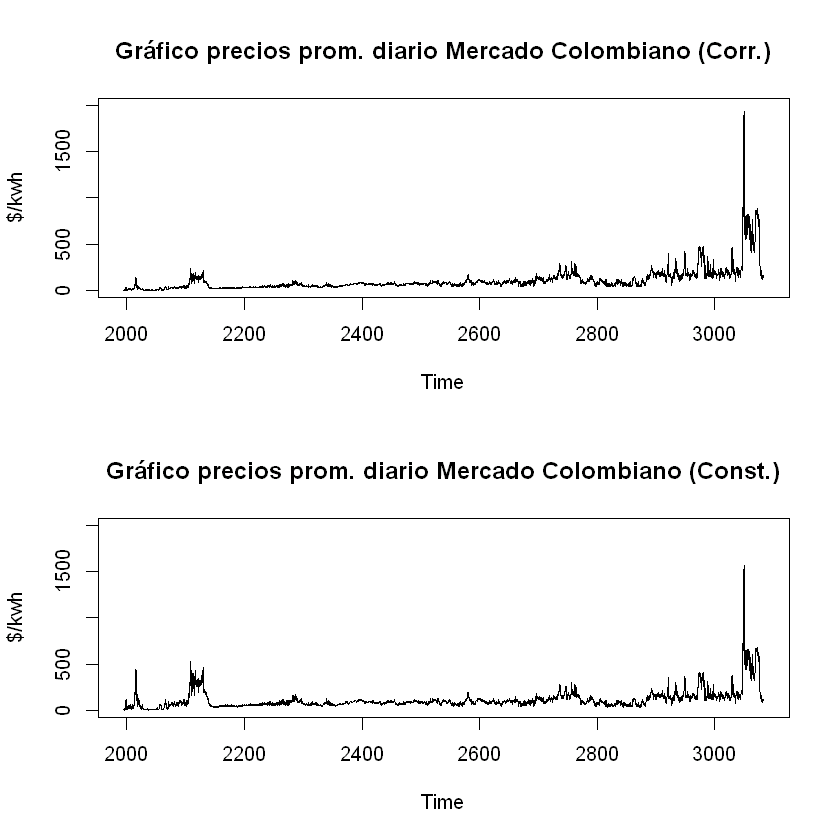

In [180]:
datos<-read.table("Precios_1995.csv",sep=",",header = TRUE) #cargo la serie de datos

current_price<-datos$Promedio_Aritmetico_...kWh._Corriente 
current_price<-ts(current_price,frequency = 7,start=1995) #construyo la serie corriente


constant_price<-datos$X..KWh_Const_Dic_2008
constant_price<-ts(constant_price,frequency = 7,start=1995) #construyo la serie constante

par(mfrow=c(2,1))

plot.ts(current_price,
        main="Gráfico precios prom. diario Mercado Colombiano (Corr.)",
        ylab="$/kwh",lwd=1,col="black",ylim=c(0,2000))
plot.ts(constant_price,
        main="Gráfico precios prom. diario Mercado Colombiano (Const.)",
        ylab="$/kwh",lwd=1,col="black",ylim=c(0,2000))


# Ajuste de ventanas

## Ventanas de 4 años


In [253]:
#head(constant_price[(length(constant_price)-longitud_pronostico+1):length(constant_price)])
length(constant_price[(cola_datos+1):(cola_datos+longitud_pronostico)])

[1] 15

In [470]:
#Se definen ventanas de 4 años para ajustar modelos
ventana<-4 #Tamaño de la ventana
longitud_ventana<-365*ventana
longitud_pronostico<-60
años<-1996:2016 #Total de años con datos
numero_modelos<-floor((length(años)/ventana)) # numero de modelos a construir
cola_datos<-length(constant_price)-longitud_ventana*(numero_modelos)-longitud_pronostico

modelos.fit<-data.frame(mod1=c(rep(NA,longitud_ventana-cola_datos),constant_price[1:cola_datos]),                 # Modelo1
mod2=constant_price[(length(constant_price)-longitud_ventana*1+1):length(constant_price)-longitud_ventana*4-longitud_pronostico],     # Modelo2
mod3=constant_price[(length(constant_price)-longitud_ventana*1+1):length(constant_price)-longitud_ventana*3-longitud_pronostico],     # Modelo3
mod4=constant_price[(length(constant_price)-longitud_ventana*1+1):length(constant_price)-longitud_ventana*2-longitud_pronostico],     # Modelo4
mod5=constant_price[(length(constant_price)-longitud_ventana*1+1):length(constant_price)-longitud_ventana*1-longitud_pronostico])     # Modelo5

mod6<-constant_price[(length(constant_price)-longitud_ventana*1+1):length(constant_price)-longitud_ventana*0-longitud_pronostico]


for4.1<-constant_price[(cola_datos+1):(cola_datos+longitud_pronostico)]
for4.2<-constant_price[(cola_datos+longitud_ventana*1+1):(cola_datos+longitud_ventana*1+longitud_pronostico)]
for4.3<-constant_price[(cola_datos+longitud_ventana*2+1):(cola_datos+longitud_ventana*2+longitud_pronostico)]
for4.4<-constant_price[(cola_datos+longitud_ventana*3+1):(cola_datos+longitud_ventana*3+longitud_pronostico)]
for4.5<-constant_price[(cola_datos+longitud_ventana*4+1):(cola_datos+longitud_ventana*4+longitud_pronostico)]
for4.6<-constant_price[(cola_datos+longitud_ventana*5+1):(cola_datos+longitud_ventana*5+longitud_pronostico)]

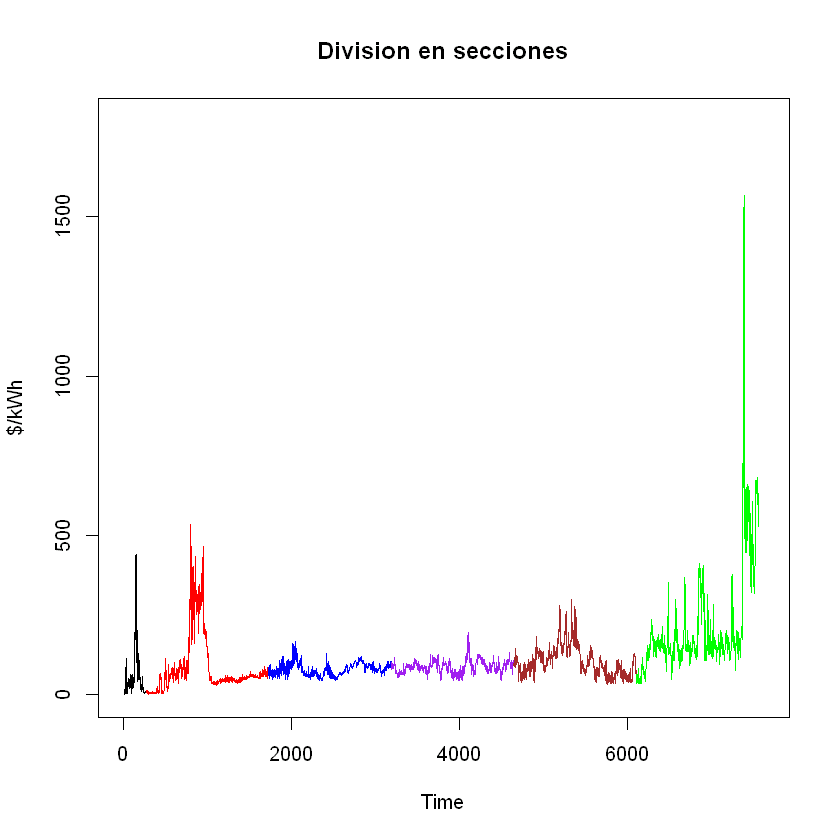

In [471]:

plot.ts(main="Division en secciones",constant_price[1:(length(constant_price)-longitud_ventana*(numero_modelos)-longitud_pronostico)],xlim=c(0,length(constant_price)),ylim=c(0,1800),ylab="$/kWh")
lines(append(rep(NA,cola_datos),modelos.fit$mod2),col="red")
lines(append(rep(NA,cola_datos+longitud_ventana),modelos.fit$mod3),col="blue")
lines(append(rep(NA,cola_datos+longitud_ventana*2),modelos.fit$mod4),col="purple")
lines(append(rep(NA,cola_datos+longitud_ventana*3),modelos.fit$mod5),col="brown")
lines(append(rep(NA,cola_datos+longitud_ventana*4),mod6),col="green")

### Ajustes de modelos con ventana de 4 años

A continuacion se probarán diferentes modelos autorregresivos para determinar:
1. Validacion de los supuestos:
    
    a. Ruido Blanco en los errores
    
    b. Seleccion de mejor modelo para pronostico

In [472]:
## Grupo 1 para ventana de 4 años
f4.1<-ts(constant_price[1:cola_datos],frequency = 7)


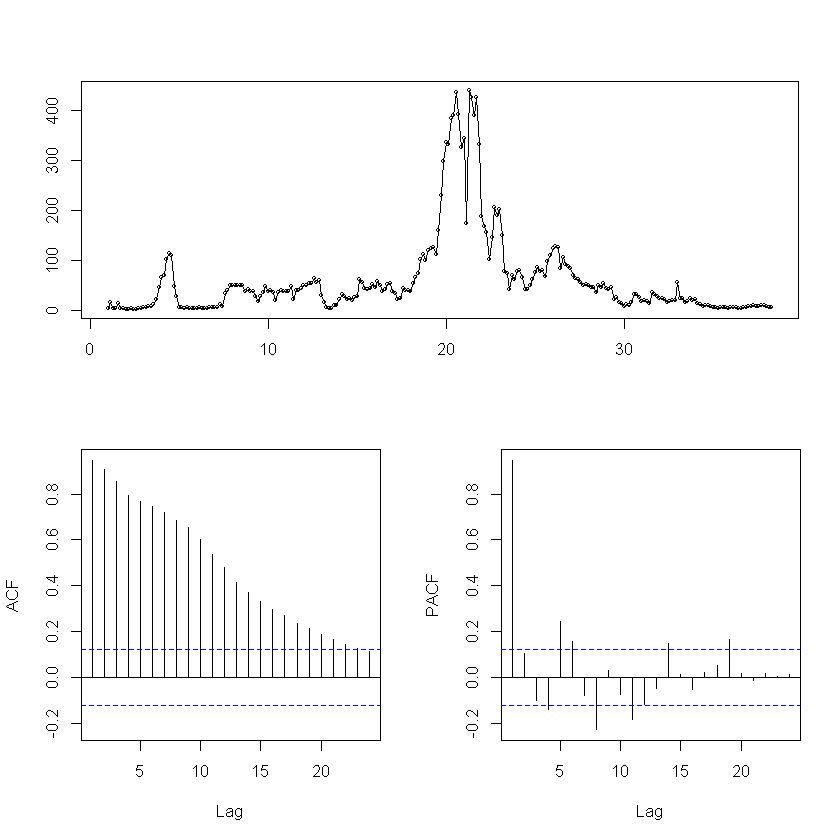

In [473]:
tsdisplay(f4.1,main="")
## Diagnostico
#Serie integrada

In [677]:
#Pruebas de raices unitarias y raices unitarias estacionales

ndiffs(x = f4.1,alpha = 0.05,test = "adf",max.d=2) #Augmented Dickey Fuller Test
ndiffs(x = f4.1,alpha = 0.05,test = "kpss",max.d=2) #Kwiatkowski–Phillips–Schmidt–Shin Test
ndiffs(x = f4.1,alpha = 0.05,test = "pp",max.d=2) #Phillips–Perron Test
nsdiffs(x=f4.1,test="ch",max.D=1) # Canova-Hansen Test
nsdiffs(x=f4.1,test="ocsb",max.D=1) #OCSB Test


[1] 1

[1] 1

[1] 1

[1] 0

[1] 0

In [475]:
fit4.1<-auto.arima(f4.1)
arimaorder(fit4.1)
fit4.1$aicc

[1] 2 1 2

[1] 2442.589

In [476]:
fit4.12<-auto.arima(f4.1,stepwise = FALSE, approximation = FALSE)
arimaorder(fit4.12)
fit4.12$aicc

[1] 0 1 4

[1] 2435.05

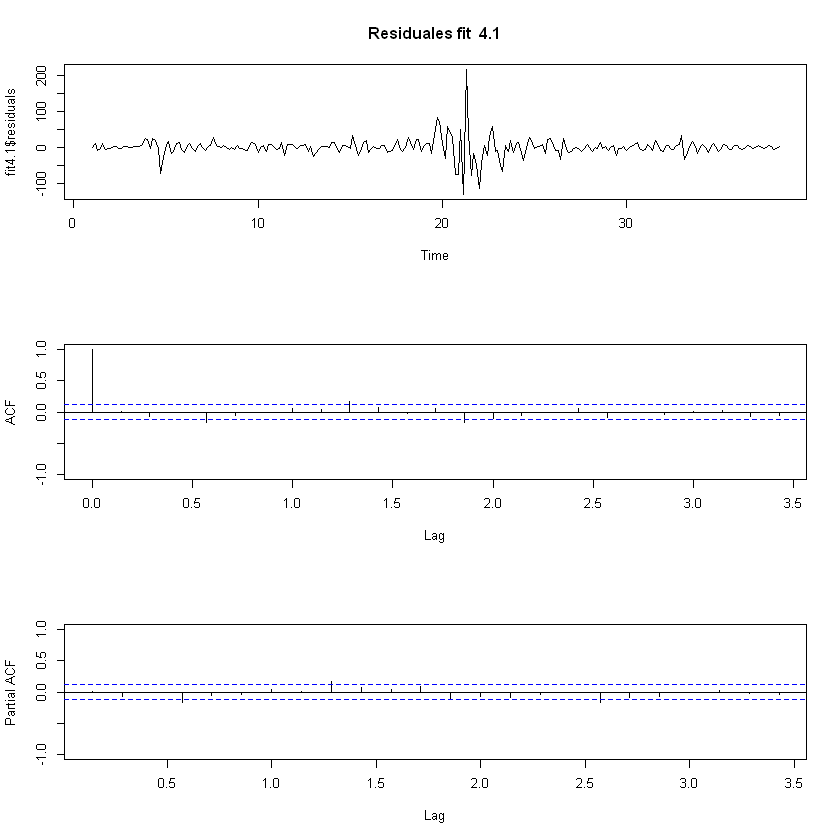

In [478]:
par(mfrow=c(3,1))
plot.ts(fit4.1$residuals,main="Residuales fit  4.1")
acf(fit4.1$residuals,ylim=c(-1,1),main="")
pacf(fit4.1$residuals,ylim=c(-1,1),main="")

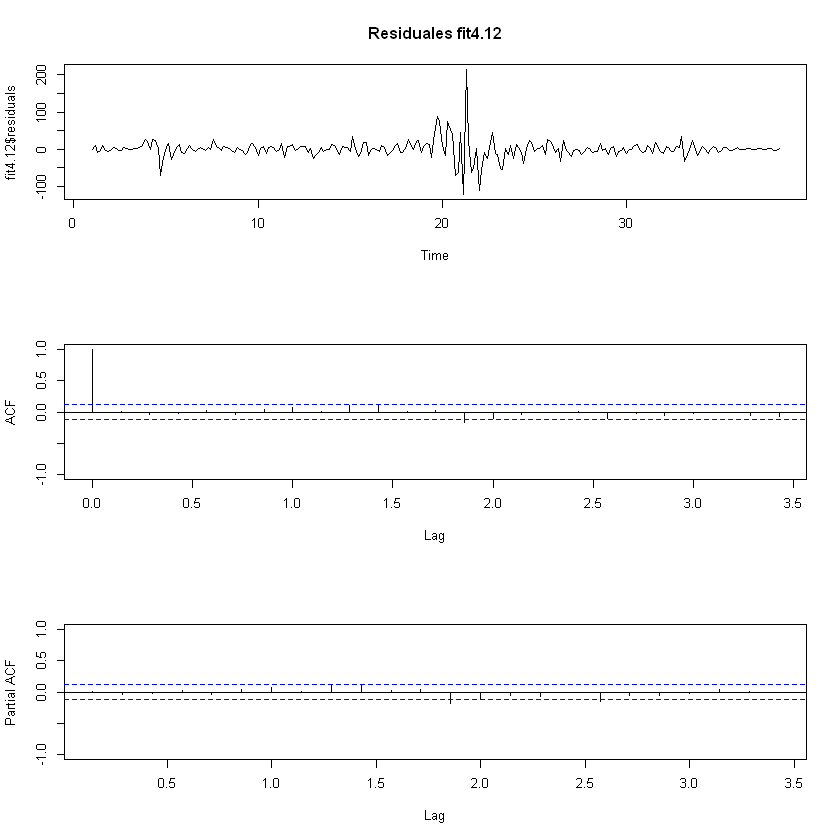

In [479]:
par(mfrow=c(3,1))
plot.ts(fit4.12$residuals,main="Residuales fit4.12")
acf(fit4.12$residuals,ylim=c(-1,1),main="")
pacf(fit4.12$residuals,ylim=c(-1,1),main="")

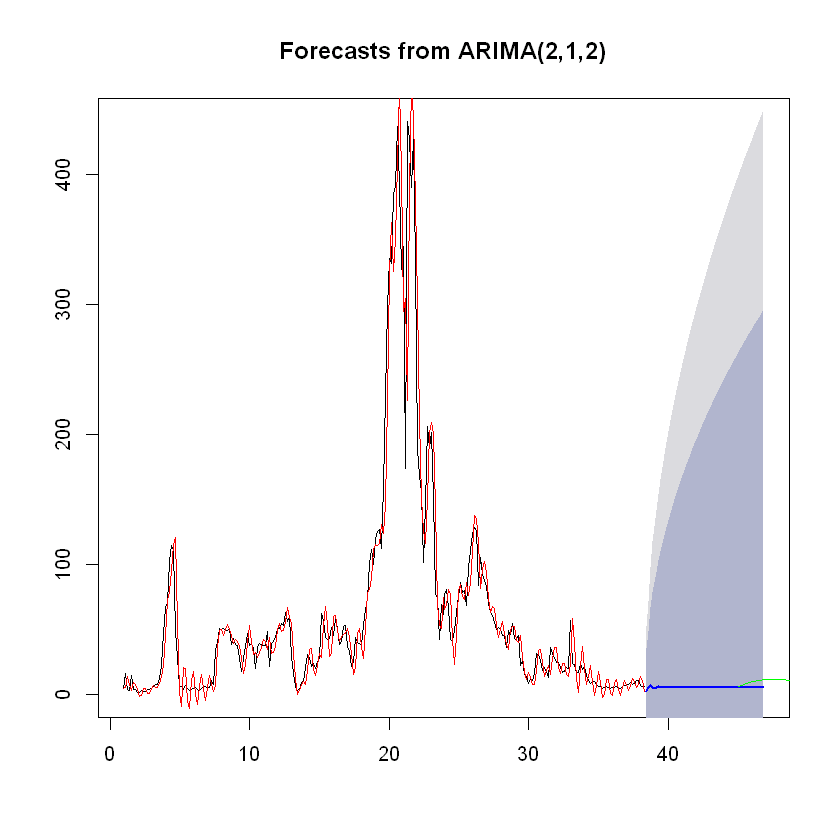

In [480]:

plot(forecast(fit4.1,h=longitud_pronostico),ylim=c(0,max(f4.1)))
lines(fitted(fit4.1),col="red")
lines(append(rep(NA,44),for4.1),col="green")

In [583]:
precision4.1<-accuracy(forecast(fit4.1,h=longitud_pronostico),for4.1)[,2] #RMSE mod ARIMA
precision4.1
precision4.12<-accuracy(forecast(fit4.12,h=longitud_pronostico),for4.1)[,2] #RMSE mod SARIMA
precision4.12

Training set     Test set 
   25.434983     3.118977

Training set     Test set 
   25.073235     2.917222

In [614]:
ordenes<-rbind(c("p","d","q","P","D","Q","S","RMSE_sample", "RMSE_for"),
               c(arimaorder(fit4.1),0,0,0,0,round(precision4.1[[1]],2),round(precision4.1[[2]],2)),
               c(arimaorder(fit4.12),0,0,0,0,round(precision4.12[[1]],2),round(precision4.12[[2]],2)))
resultados4.1<-cbind(c("","Muestra 4.1","Muestra 4.12"),ordenes)
resultados4.1

,p,d,q,P,D,Q,S,RMSE_sample,RMSE_for
Muestra 4.1,2,1,2,0,0,0,0,25.43,3.12
Muestra 4.12,0,1,4,0,0,0,0,25.07,2.92


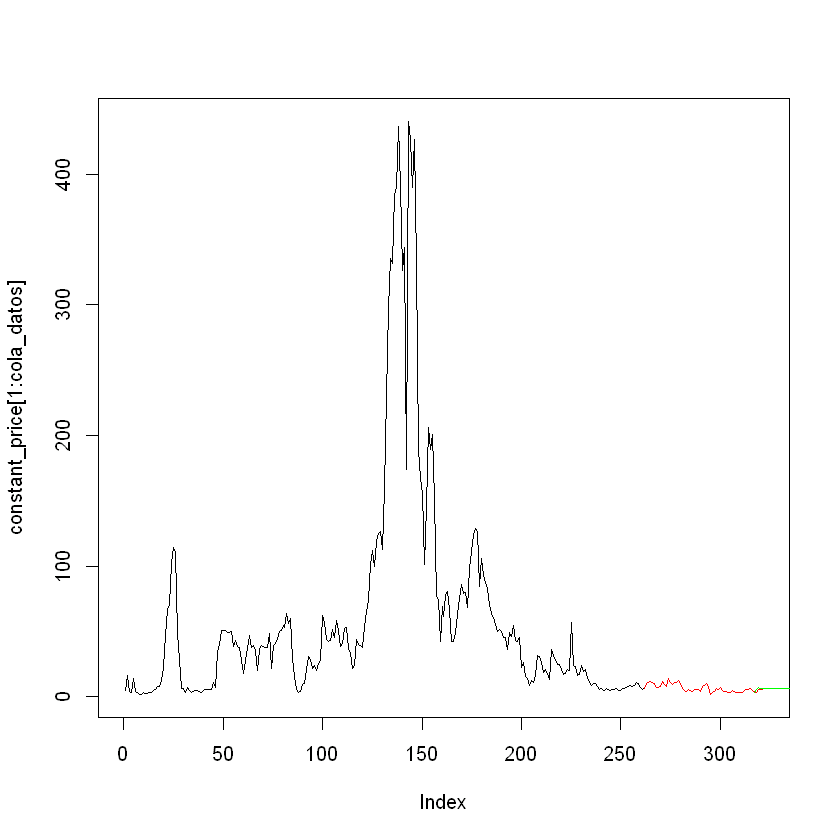

In [496]:
plot(constant_price[1:cola_datos],type="l",xlim=c(0,322))
lines(append(rep(NA,cola_datos-1),for4.1),col="red")
res<-forecast(fit4.12,h=longitud_pronostico)
lines(append(rep(NA,316),res$mean),col="green",lwd=1)

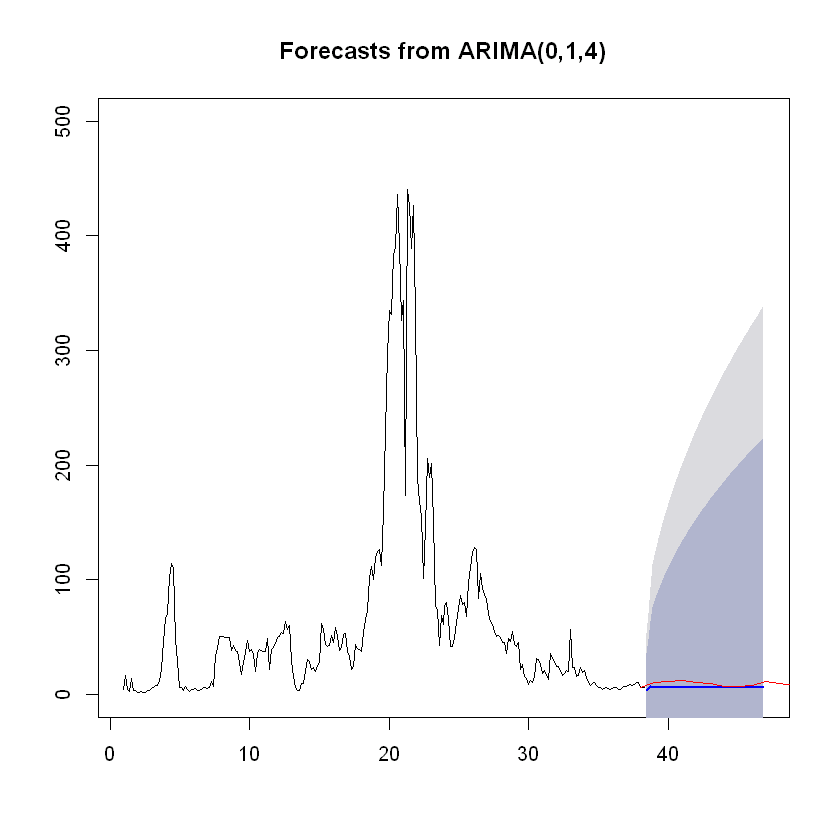

In [493]:
plot(forecast(fit4.12,h=longitud_pronostico),ylim=c(0,500))
lines(append(rep(NA,37),for4.1),col="red")

In [483]:
## Grupo 2 para ventana de 4 años
f4.2<-ts(modelos.fit$mod2,frequency = 7)

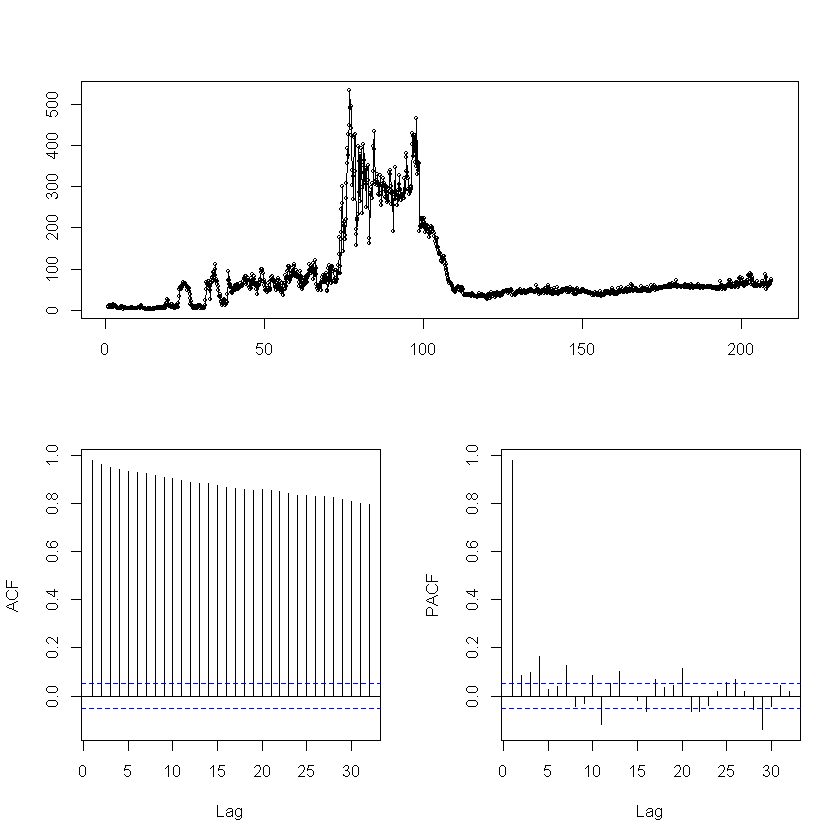

In [484]:
tsdisplay(f4.2,main="")

In [680]:
#Pruebas de raices unitarias y raices unitarias estacionales

ndiffs(x = f4.2,alpha = 0.05,test = "adf",max.d=2) #Augmented Dickey Fuller Test
ndiffs(x = f4.2,alpha = 0.05,test = "kpss",max.d=2) #Kwiatkowski–Phillips–Schmidt–Shin Test
ndiffs(x = f4.2,alpha = 0.05,test = "pp",max.d=2) #Phillips–Perron Test
nsdiffs(x=f4.2,m=7,test="ch",max.D=1) # Canova-Hansen Test
nsdiffs(x=f4.2,m=7,test="ocsb",max.D=1) #OCSB Test

[1] 1

[1] 1

[1] 0

[1] 1

[1] 0

In [486]:
fit4.2<-auto.arima(f4.2)
arimaorder(fit4.2)
fit4.2$aicc

[1] 1 1 1 0 0 2 7

[1] 12616

In [682]:
fit4.21<-auto.arima(f4.2,stepwise = FALSE,approximation = FALSE,D=1)
arimaorder(fit4.21)
fit4.21$aicc

[1] 1 0 1 0 1 1 7

[1] 10077.98

In [487]:
fit4.22<-auto.arima(f4.2,stepwise = FALSE,approximation = FALSE)
arimaorder(fit4.22)
fit4.22$aicc

[1] 0 1 3 1 0 0 7

[1] 12600.97

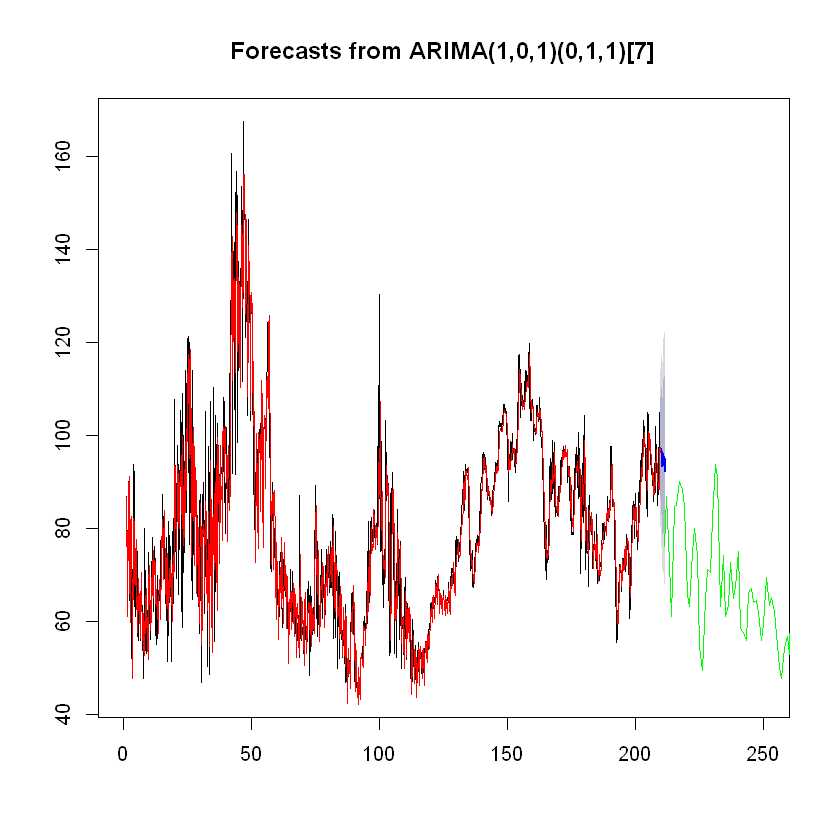

In [684]:
plot(forecast(fit4.21,h=longitud_pronostico),xlim=c(0,250))
lines(fitted(fit4.21),col="red")
lines(append(rep(NA,210),for4.2),col="green")

In [685]:
precision4.2<-accuracy(forecast(fit4.2,h=longitud_pronostico),for4.2)[,2] #RMSE mod1 SARIMA
precision4.21<-accuracy(forecast(fit4.21,h=longitud_pronostico),for4.2)[,2] #RMSE mod2 SARIMA
precision4.22<-accuracy(forecast(fit4.22,h=longitud_pronostico),for4.2)[,2] #RMSE mod2 SARIMA
precision4.2
precision4.21
precision4.22

Training set     Test set 
    7.686823    22.097730

Training set     Test set 
    7.686823    22.097730

Training set     Test set 
    18.09341     13.02185

In [687]:
ordenes<-rbind(c("p","d","q","P","D","Q","S","RMSE_sample", "RMSE_for"),
               c(arimaorder(fit4.2),round(precision4.2[[1]],2),round(precision4.2[[2]],2)),
               c(arimaorder(fit4.21),round(precision4.21[[1]],2),round(precision4.21[[2]],2)),
               c(arimaorder(fit4.22),round(precision4.22[[1]],2),round(precision4.22[[2]],2)))
resultados4.2<-cbind(c("","Muestra 4.2","Muestra 4.21","Muestra 4.22"),ordenes)
resultados4.2

,p,d,q,P,D,Q,S,RMSE_sample,RMSE_for
Muestra 4.2,1,0,1,0,1,1,7,7.69,22.1
Muestra 4.21,1,0,1,0,1,1,7,7.69,22.1
Muestra 4.22,0,1,3,1,0,0,7,18.09,13.02


In [500]:
## Grupo 3 para ventana de 4 años
f4.3<-ts(modelos.fit$mod3,frequency = 7)

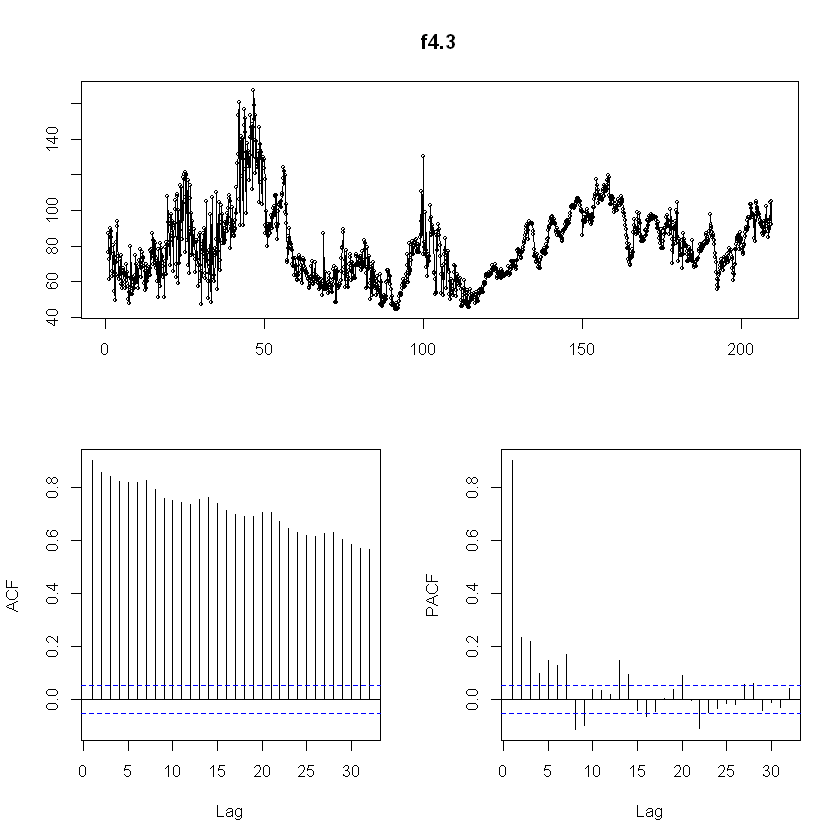

In [501]:
tsdisplay(f4.3)

In [683]:
#Pruebas de raices unitarias y raices unitarias estacionales

ndiffs(x = f4.3,alpha = 0.05,test = "adf",max.d=2) #Augmented Dickey Fuller Test
ndiffs(x = f4.3,alpha = 0.05,test = "kpss",max.d=2) #Kwiatkowski–Phillips–Schmidt–Shin Test
ndiffs(x = f4.3,alpha = 0.05,test = "pp",max.d=2) #Phillips–Perron Test
nsdiffs(x=f4.3,m=7,test="ch",max.D=2) # Canova-Hansen Test
nsdiffs(x=f4.3,m=7,test="ocsb",max.D=2) #OCSB Test

[1] 1

[1] 1

[1] 0

[1] 1

[1] 0

In [503]:
fit4.3<-auto.arima(f4.3)
arimaorder(fit4.3)
fit4.3$aicc

[1] 5 1 2 0 0 2 7

[1] 10211.92

In [504]:
fit4.31<-auto.arima(f4.3,d=1,D=1)
arimaorder(fit4.31)
fit4.31$aicc

[1] 1 1 2 2 1 0 7

[1] 10361.38

In [588]:
fit4.32<-auto.arima(f4.3,d=1,stepwise = FALSE,approximation = FALSE)
arimaorder(fit4.32)
fit4.32$aicc

[1] 1 1 2 2 0 0 7

[1] 10192.41

In [506]:
fit4.33<-auto.arima(f4.3,stepwise = FALSE,approximation = FALSE)
arimaorder(fit4.33)
fit4.33$aicc

[1] 1 1 2 2 0 0 7

[1] 10192.41

In [508]:
fit4.34<-auto.arima(f4.3,D=1,stepwise = FALSE,approximation = FALSE)
arimaorder(fit4.34)
fit4.34$aicc

[1] 1 0 1 0 1 1 7

[1] 10077.98

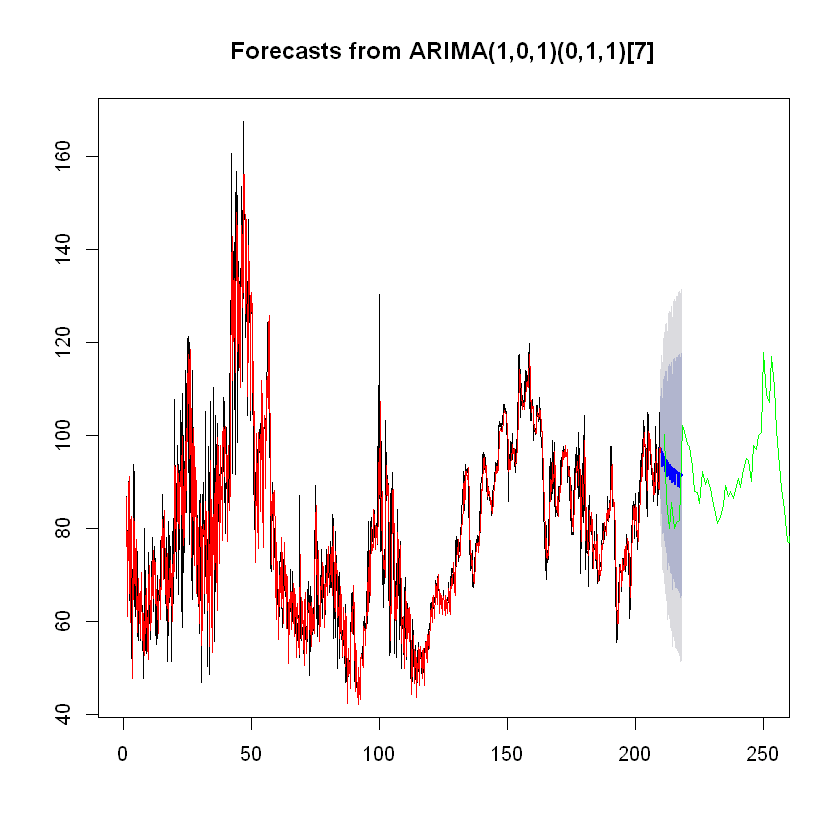

In [513]:
plot(forecast(fit4.34,h=longitud_pronostico),xlim=c(0,250))
lines(fitted(fit4.34),col="red")
lines(append(rep(NA,210),for4.3),col="green")

In [589]:
precision4.3<-accuracy(forecast(fit4.3,h=longitud_pronostico),for4.3)[,2] #RMSE mod1 SARIMA
precision4.31<-accuracy(forecast(fit4.31,h=longitud_pronostico),for4.3)[,2] #RMSE mod2 SARIMA
precision4.32<-accuracy(forecast(fit4.32,h=longitud_pronostico),for4.3)[,2] #RMSE mod3 SARIMA
precision4.33<-accuracy(forecast(fit4.33,h=longitud_pronostico),for4.3)[,2] #RMSE mod4 SARIMA
precision4.34<-accuracy(forecast(fit4.34,h=longitud_pronostico),for4.3)[,2] #RMSE mod5 SARIMA

precision4.3
precision4.31
precision4.32
precision4.33
precision4.34

Training set     Test set 
    7.949987    12.430052

Training set     Test set 
     8.50572     23.14301

Training set     Test set 
    7.918102    12.491567

Training set     Test set 
    7.686823    11.408372

Training set     Test set 
    7.686823    11.408372

In [593]:
ordenes<-rbind(c("p","d","q","P","D","Q","S","RMSE_sample", "RMSE_for"),
               c(arimaorder(fit4.3),round(precision4.3[[1]],2),round(precision4.3[[2]],2)),
               c(arimaorder(fit4.31),round(precision4.31[[1]],2),round(precision4.31[[2]],2)),
               c(arimaorder(fit4.32),round(precision4.32[[1]],2),round(precision4.32[[2]],2)),
               c(arimaorder(fit4.33),round(precision4.33[[1]],2),round(precision4.33[[2]],2)),
               c(arimaorder(fit4.34),round(precision4.34[[1]],2),round(precision4.34[[2]],2))
              )
resultados4.3<-cbind(c("","Muestra 3","Muestra 3.1","Muestra 3.2","Muestra 3.3","Muestra 3.4"),ordenes)
resultados4.3

,p,d,q,P,D,Q,S,RMSE_sample,RMSE_for
Muestra 3,5,1,2,0,0,2,7,7.95,12.43
Muestra 3.1,1,1,2,2,1,0,7,8.51,23.14
Muestra 3.2,1,1,2,2,0,0,7,7.92,12.49
Muestra 3.3,1,0,1,0,1,1,7,7.69,11.41
Muestra 3.4,1,0,1,0,1,1,7,7.69,11.41


In [514]:
## Grupo 4 para ventana de 4 años
f4.4<-ts(modelos.fit$mod4,frequency = 7)

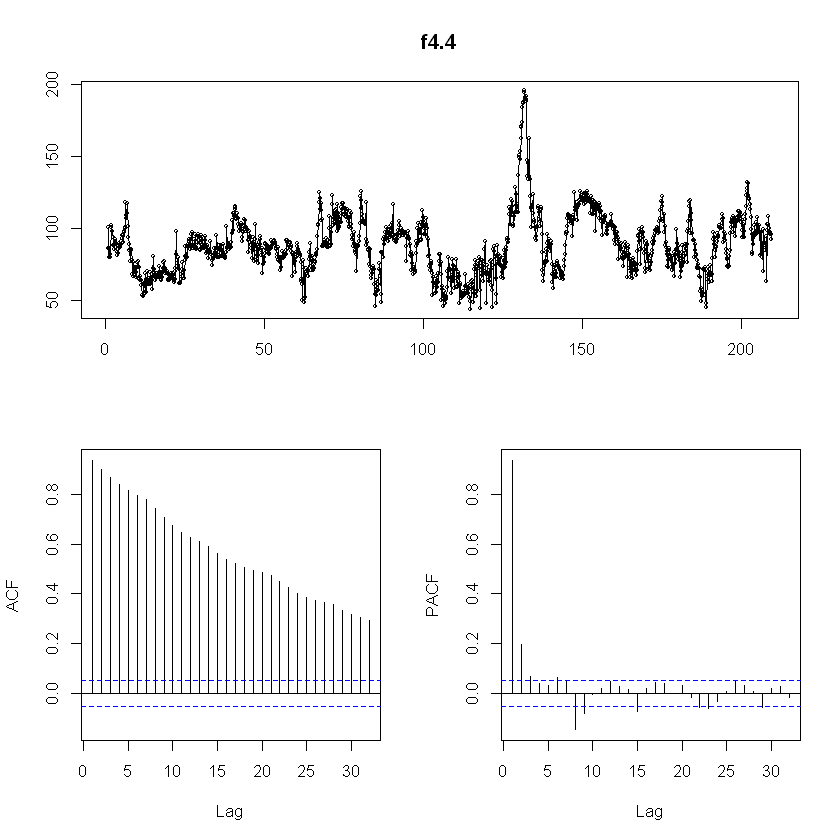

In [515]:
tsdisplay(f4.4)

In [688]:
#Pruebas de raices unitarias y raices unitarias estacionales

ndiffs(x = f4.4,alpha = 0.05,test = "adf",max.d=2) #Augmented Dickey Fuller Test
ndiffs(x = f4.4,alpha = 0.05,test = "kpss",max.d=2) #Kwiatkowski–Phillips–Schmidt–Shin Test
ndiffs(x = f4.4,alpha = 0.05,test = "pp",max.d=2) #Phillips–Perron Test
nsdiffs(x=f4.4,m=7,test="ch",max.D=2) # Canova-Hansen Test
nsdiffs(x=f4.4,m=7,test="ocsb",max.D=2) #OCSB Test

[1] 0

[1] 1

[1] 0

[1] 0

[1] 0

In [517]:
fit4.4<-auto.arima(f4.4,stepwise = FALSE,approximation = FALSE)
arimaorder(fit4.4)
fit4.4$aicc

[1] 1 1 1 2 0 0 7

[1] 9833.977

In [518]:
fit4.41<-auto.arima(f4.4)
arimaorder(fit4.41)
fit4.41$aicc

[1] 1 1 1 0 0 2 7

[1] 9837.973

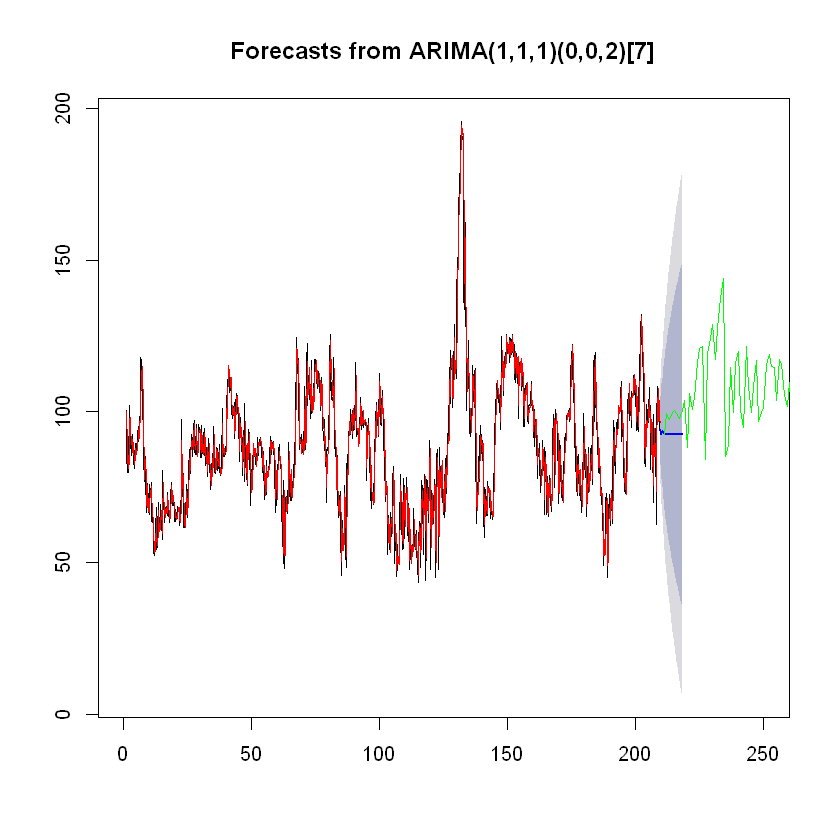

In [520]:
plot(forecast(fit4.41,h=longitud_pronostico),xlim=c(0,250))
lines(fitted(fit4.41),col="red")
lines(append(rep(NA,210),for4.4),col="green")

In [594]:
precision4.4<-accuracy(forecast(fit4.4,h=longitud_pronostico),for4.4)[,2] #RMSE mod1 SARIMA
precision4.41<-accuracy(forecast(fit4.41,h=longitud_pronostico),for4.4)[,2] #RMSE mod2 SARIMA

precision4.4
precision4.41

Training set     Test set 
    7.009633    20.943939

Training set     Test set 
    7.019367    21.027788

In [597]:
ordenes<-rbind(c("p","d","q","P","D","Q","S","RMSE_sample", "RMSE_for"),
               c(arimaorder(fit4.4),round(precision4.4[[1]],2),round(precision4.4[[2]],2)),
               c(arimaorder(fit4.41),round(precision4.41[[1]],2),round(precision4.41[[2]],2)))
resultados4.4<-cbind(c("","Muestra 4.4","Muestra 4.41"),ordenes)
resultados4.4

,p,d,q,P,D,Q,S,RMSE_sample,RMSE_for
Muestra 4.4,1,1,1,2,0,0,7,7.01,20.94
Muestra 4.41,1,1,1,0,0,2,7,7.02,21.03


In [521]:
## Grupo 5 para ventana de 4 años
f4.5<-ts(modelos.fit$mod5,frequency = 7)

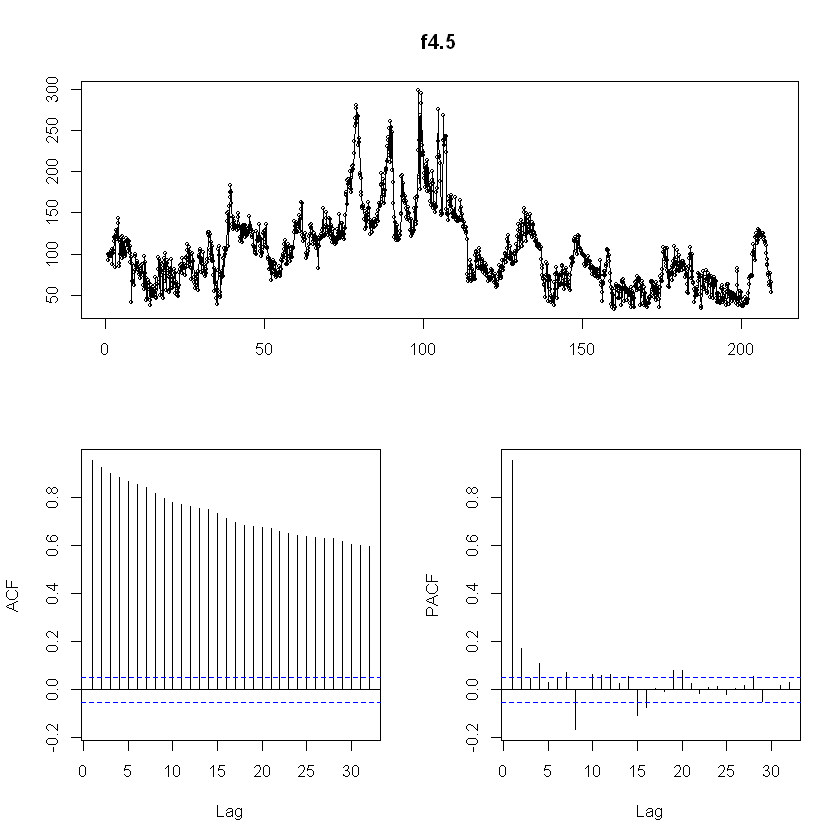

In [522]:
tsdisplay(f4.5)

In [689]:
#Pruebas de raices unitarias y raices unitarias estacionales

ndiffs(x = f4.5,alpha = 0.05,test = "adf",max.d=2) #Augmented Dickey Fuller Test
ndiffs(x = f4.5,alpha = 0.05,test = "kpss",max.d=2) #Kwiatkowski–Phillips–Schmidt–Shin Test
ndiffs(x = f4.5,alpha = 0.05,test = "pp",max.d=2) #Phillips–Perron Test
nsdiffs(x=f4.5,m=7,test="ch",max.D=2) # Canova-Hansen Test
nsdiffs(x=f4.5,m=7,test="ocsb",max.D=2) #OCSB Test

[1] 0

[1] 1

[1] 0

[1] 0

[1] 0

In [526]:
fit4.5<-auto.arima(f4.5,stepwise = FALSE,approximation = FALSE)
arimaorder(fit4.5)
fit4.5$aicc

[1] 2 1 1 2 0 0 7

[1] 11608.06

In [527]:
fit4.51<-auto.arima(f4.5)
arimaorder(fit4.51)
fit4.51$aicc

[1] 2 1 4 0 0 2 7

[1] 11620.26

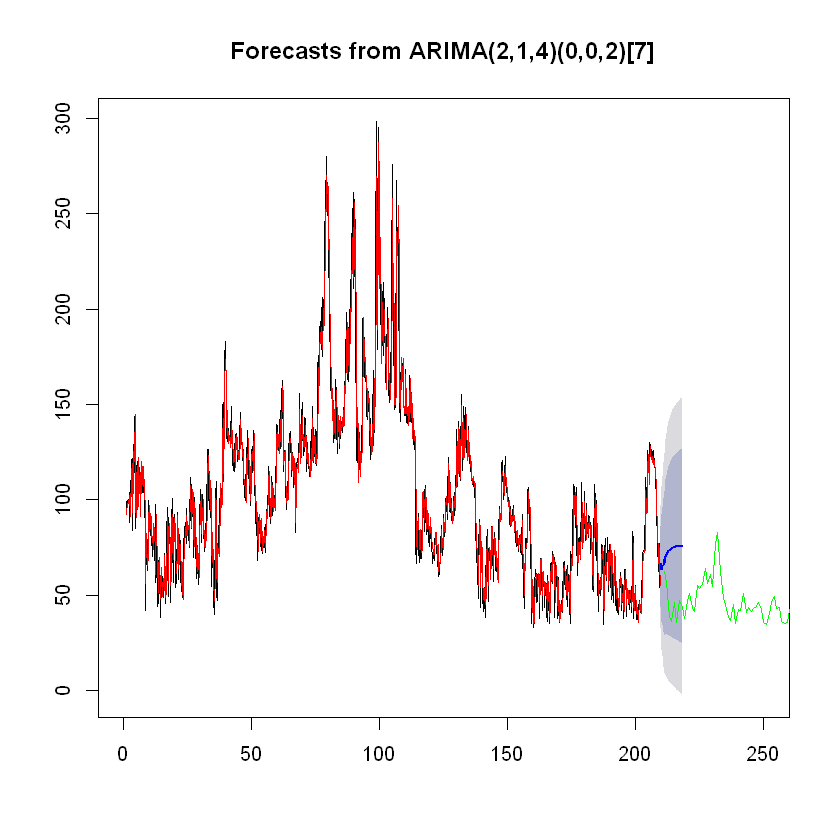

In [534]:
plot(forecast(fit4.51,h=longitud_pronostico),xlim=c(0,250))
lines(fitted(fit4.51),col="red")
lines(append(rep(NA,210),for4.5),col="green")

In [596]:
precision4.5<-accuracy(forecast(fit4.5,h=longitud_pronostico),for4.5)[,2] #RMSE mod1 SARIMA
precision4.51<-accuracy(forecast(fit4.51,h=longitud_pronostico),for4.5)[,2] #RMSE mod2 SARIMA

precision4.5
precision4.51

Training set     Test set 
    12.86246     27.31592

Training set     Test set 
    12.89018     28.55547

In [598]:
ordenes<-rbind(c("p","d","q","P","D","Q","S","RMSE_sample", "RMSE_for"),
               c(arimaorder(fit4.5),round(precision4.5[[1]],2),round(precision4.5[[2]],2)),
               c(arimaorder(fit4.51),round(precision4.51[[1]],2),round(precision4.51[[2]],2)))
resultados4.5<-cbind(c("","Muestra 4.5","Muestra 4.51"),ordenes)
resultados4.5

,p,d,q,P,D,Q,S,RMSE_sample,RMSE_for
Muestra 4.5,2,1,1,2,0,0,7,12.86,27.32
Muestra 4.51,2,1,4,0,0,2,7,12.89,28.56


In [536]:
## Grupo 6 para ventana de 4 años
f4.6<-ts(mod6,frequency = 7)

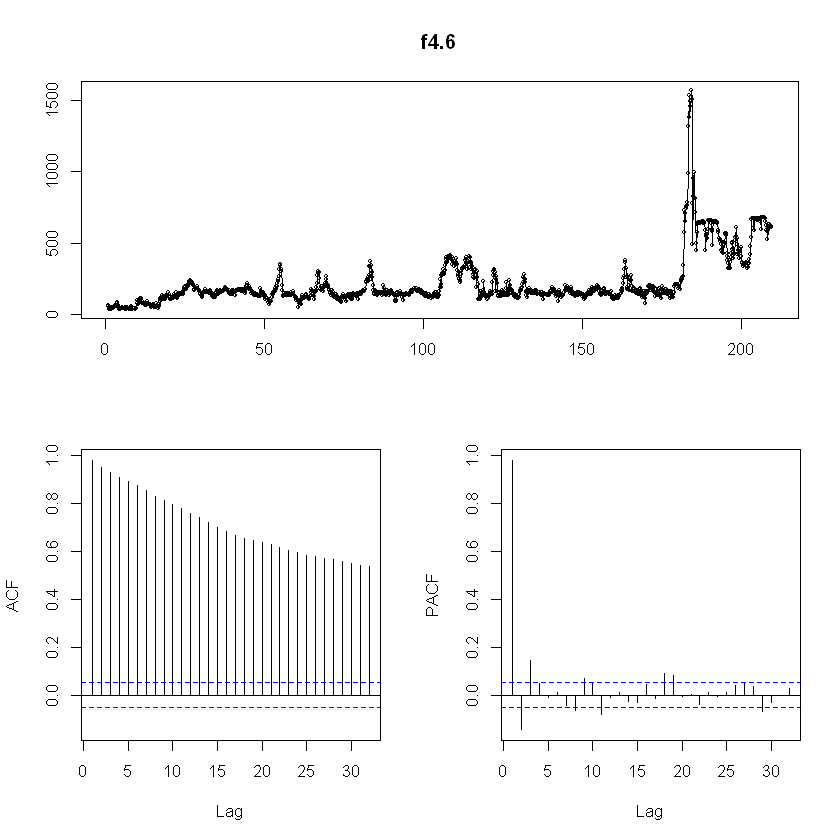

In [537]:
tsdisplay(f4.6)

In [690]:
#Pruebas de raices unitarias y raices unitarias estacionales

ndiffs(x = f4.6,alpha = 0.05,test = "adf",max.d=2) #Augmented Dickey Fuller Test
ndiffs(x = f4.6,alpha = 0.05,test = "kpss",max.d=2) #Kwiatkowski–Phillips–Schmidt–Shin Test
ndiffs(x = f4.6,alpha = 0.05,test = "pp",max.d=2) #Phillips–Perron Test
nsdiffs(x=f4.6,m=7,test="ch",max.D=1) # Canova-Hansen Test
nsdiffs(x=f4.6,m=7,test="ocsb",max.D=1) #OCSB Test

[1] 0

[1] 1

[1] 0

[1] 0

[1] 0

In [544]:
fit4.6<-auto.arima(f4.6,stepwise = FALSE,approximation = FALSE)
arimaorder(fit4.6)
fit4.6$aicc

[1] 3 1 0 1 0 0 7

[1] 14614.07

In [545]:
fit4.61<-auto.arima(f4.6,D=1,stepwise = FALSE,approximation = FALSE)
arimaorder(fit4.61)
fit4.61$aicc

[1] 3 0 0 2 1 0 7

[1] 14852.42

In [546]:
fit4.62<-auto.arima(f4.6)
arimaorder(fit4.62)
fit4.62$aicc

[1] 0 1 3 0 0 1 7

[1] 14614.38

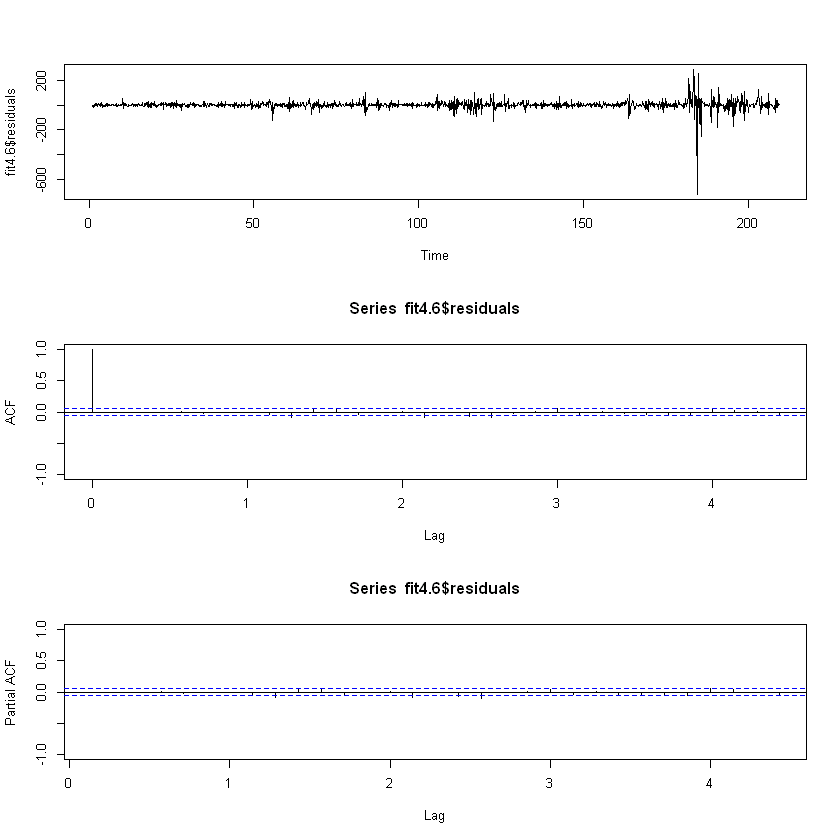

In [703]:
par(mfrow=c(3,1))
plot.ts(fit4.6$residuals)
acf(fit4.6$residuals,ylim=c(-1,1))
pacf(fit4.6$residuals,ylim=c(-1,1))


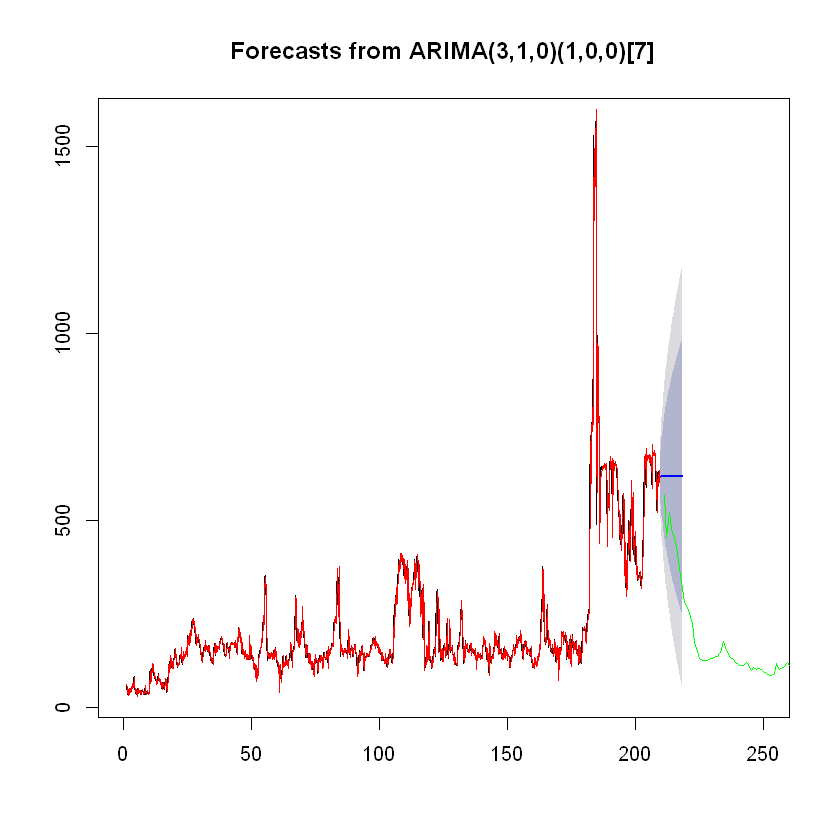

In [550]:
plot(forecast(fit4.6,h=longitud_pronostico),xlim=c(0,250))
lines(fitted(fit4.6),col="red")
lines(append(rep(NA,210),for4.6),col="green")

In [599]:
precision4.6<-accuracy(forecast(fit4.6,h=longitud_pronostico),for4.6)[,2] #RMSE mod1 SARIMA
precision4.62<-accuracy(forecast(fit4.62,h=longitud_pronostico),for4.6)[,2] #RMSE mod2 SARIMA

precision4.6
precision4.62

Training set     Test set 
    36.07066    461.35792

Training set     Test set 
    36.07462    460.75006

In [600]:
ordenes<-rbind(c("p","d","q","P","D","Q","S","RMSE_sample", "RMSE_for"),
               c(arimaorder(fit4.6),round(precision4.6[[1]],2),round(precision4.6[[2]],2)),
               c(arimaorder(fit4.62),round(precision4.62[[1]],2),round(precision4.62[[2]],2)))
resultados4.6<-cbind(c("","Muestra 4.6","Muestra 4.62"),ordenes)
resultados4.6

,p,d,q,P,D,Q,S,RMSE_sample,RMSE_for
Muestra 4.6,3,1,0,1,0,0,7,36.07,461.36
Muestra 4.62,0,1,3,0,0,1,7,36.07,460.75


In [691]:
rbind(resultados4.1,resultados4.2,resultados4.3,resultados4.4,resultados4.5,resultados4.6)

,p,d,q,P,D,Q,S,RMSE_sample,RMSE_for
Muestra 4.1,2,1,2,0,0,0,0,25.43,3.12
Muestra 4.12,0,1,4,0,0,0,0,25.07,2.92
,p,d,q,P,D,Q,S,RMSE_sample,RMSE_for
Muestra 4.2,1,0,1,0,1,1,7,7.69,22.1
Muestra 4.21,1,0,1,0,1,1,7,7.69,22.1
Muestra 4.22,0,1,3,1,0,0,7,18.09,13.02
,p,d,q,P,D,Q,S,RMSE_sample,RMSE_for
Muestra 3,5,1,2,0,0,2,7,7.95,12.43
Muestra 3.1,1,1,2,2,1,0,7,8.51,23.14
Muestra 3.2,1,1,2,2,0,0,7,7.92,12.49


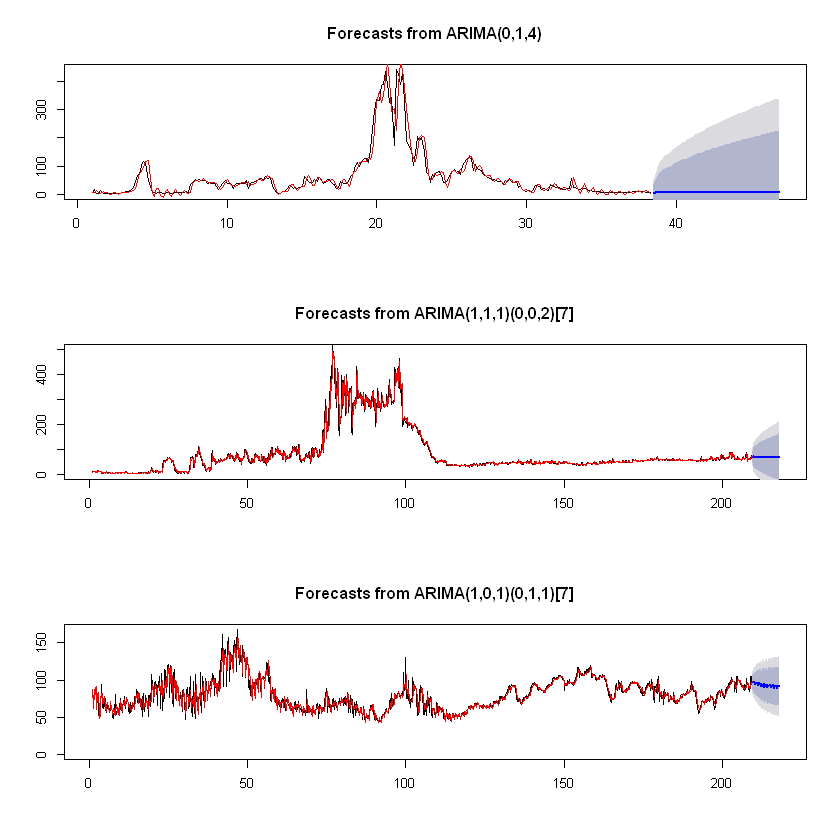

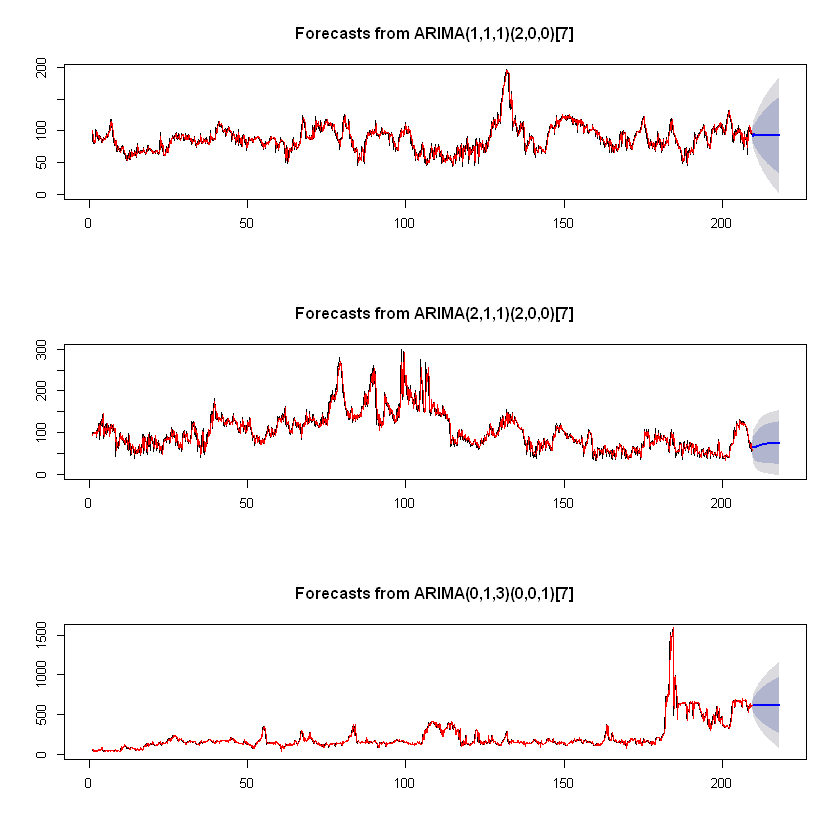

In [620]:
par(mfrow=c(3,1))

plot(forecast(fit4.12,h=longitud_pronostico),ylim=c(0,max(f4.1)))
lines(fitted(fit4.1),col="red")
lines(append(rep(NA,longitud_ventana),for4.1),col="green")

######################################################################################

plot(forecast(fit4.2,h=longitud_pronostico),ylim=c(0,max(500)))
lines(fitted(fit4.2),col="red")
lines(append(rep(NA,longitud_ventana),for4.2),col="green")

######################################################################################

plot(forecast(fit4.34,h=longitud_pronostico),ylim=c(0,max(f4.3)))
lines(fitted(fit4.34),col="red")
lines(append(rep(NA,longitud_ventana),for4.3),col="green")

#####################################################################################
plot(forecast(fit4.4,h=longitud_pronostico),ylim=c(0,max(f4.4)))
lines(fitted(fit4.4),col="red")
lines(append(rep(NA,longitud_ventana),for4.4),col="green")

#####################################################################################

plot(forecast(fit4.5,h=longitud_pronostico),ylim=c(0,max(f4.5)))
lines(fitted(fit4.5),col="red")
lines(append(rep(NA,longitud_ventana),for4.5),col="green")

####################################################################################
plot(forecast(fit4.62,h=longitud_pronostico),ylim=c(0,max(f4.6)))
lines(fitted(fit4.62),col="red")
lines(append(rep(NA,length(mod6)-length(longitud_pronostico)),for4.6),col="green")


## Ventanas de 8

In [672]:
#Se definen ventanas de 8 años para ajustar modelos
ventana<-8 #Tamaño de la ventana
longitud_ventana<-365*ventana
longitud_pronostico<-15
años<-1996:2016 #Total de años con datos
numero_modelos<-floor((length(años)/ventana)) # numero de modelos a construir
cola_datos<-length(constant_price)-longitud_ventana*(numero_modelos)-longitud_pronostico






modelos8.fit<-data.frame(mod1=c(rep(NA,longitud_ventana-cola_datos),constant_price[1:cola_datos]),                # Modelo1
mod2=constant_price[(cola_datos+1):(cola_datos+longitud_ventana)],     # Modelo2
mod3=constant_price[(cola_datos+1+longitud_ventana):(cola_datos+longitud_ventana*2)])     # Modelo3
                        

for8.1<-constant_price[(cola_datos+1):(cola_datos+longitud_pronostico)]
for8.2<-constant_price[(cola_datos+longitud_ventana*1+1):(cola_datos+longitud_ventana*1+longitud_pronostico)]
for8.3<-constant_price[(cola_datos+longitud_ventana*2+1):(cola_datos+longitud_ventana*2+longitud_pronostico)]


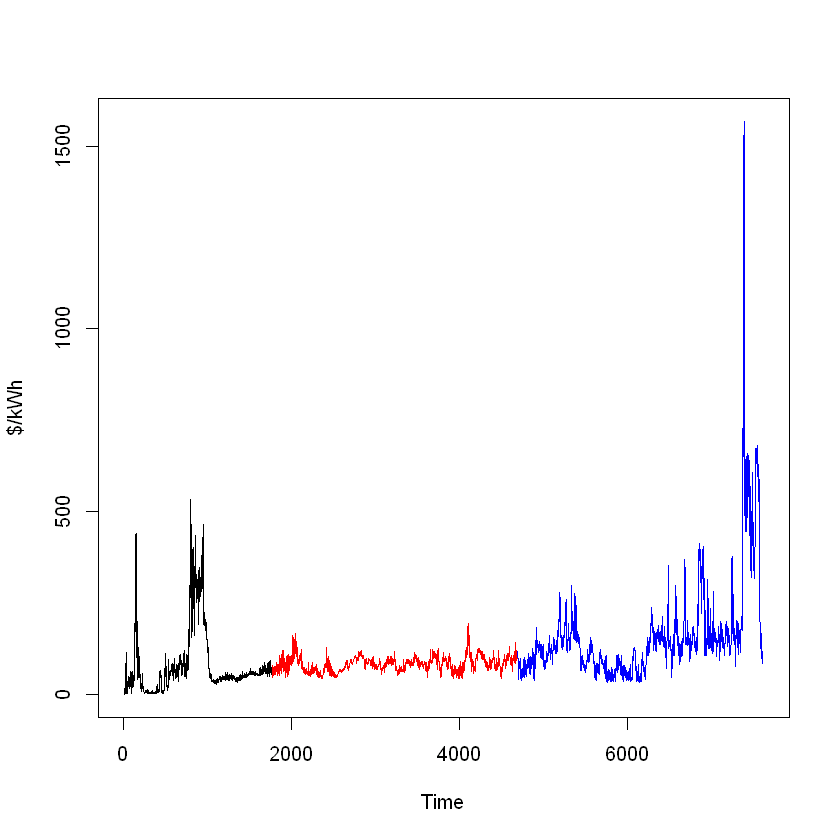

In [666]:
plot.ts(constant_price[1:cola_datos],xlim=c(0,length(constant_price)),ylim=c(0,max(constant_price)),ylab="$/kWh")
lines(append(rep(NA,cola_datos),modelos8.fit$mod2),col="red")
lines(append(rep(NA,(cola_datos+longitud_ventana)),modelos8.fit$mod3),col="blue")

In [694]:
#Grupo 1 Ventana de 8 años
f8.1<-ts(constant_price[1:cola_datos],frequency = 7)

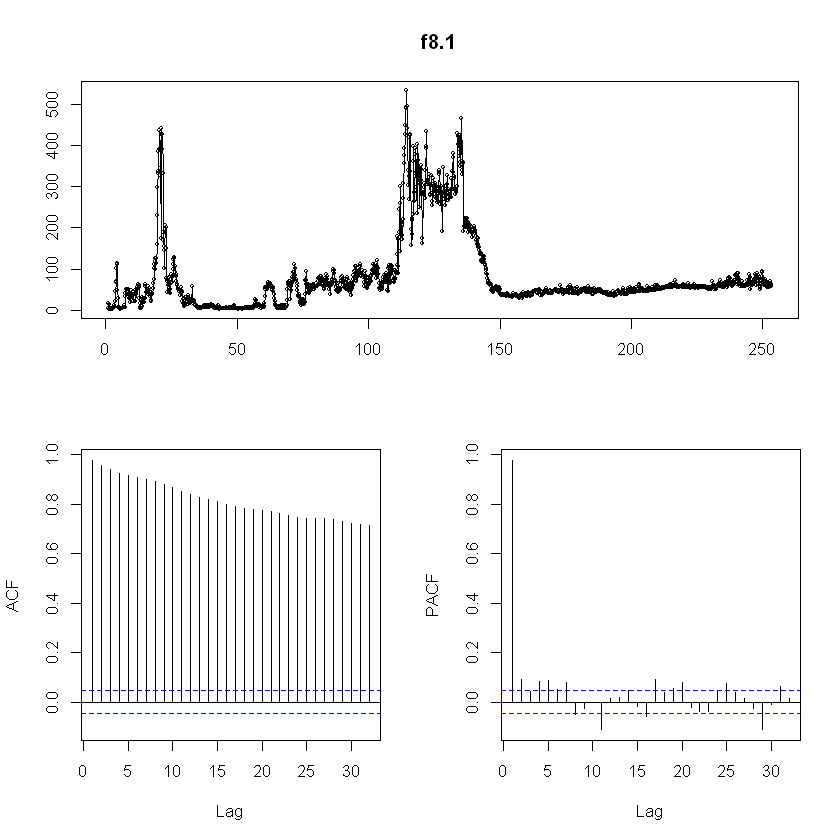

In [695]:
tsdisplay(f8.1)

In [696]:
#Pruebas de raices unitarias y raices unitarias estacionales

ndiffs(x = f8.1,alpha = 0.05,test = "adf",max.d=2) #Augmented Dickey Fuller Test
ndiffs(x = f8.1,alpha = 0.05,test = "kpss",max.d=2) #Kwiatkowski–Phillips–Schmidt–Shin Test
ndiffs(x = f8.1,alpha = 0.05,test = "pp",max.d=2) #Phillips–Perron Test
nsdiffs(x=f8.1,m=7,test="ch",max.D=1) # Canova-Hansen Test
nsdiffs(x=f8.1,m=7,test="ocsb",max.D=1) #OCSB Test

[1] 1

[1] 1

[1] 0

[1] 0

[1] 0

In [697]:
fit8.1<-auto.arima(f8.1)
arimaorder(fit8.1)
fit8.1$aicc

[1] 1 1 1 0 0 1 7

[1] 15566.44

In [707]:
fit8.12<-auto.arima(f8.1,stepwise=FALSE,approximation=FALSE)
arimaorder(fit8.12)
fit8.12$aicc

[1] 3 1 2

[1] 15564.7

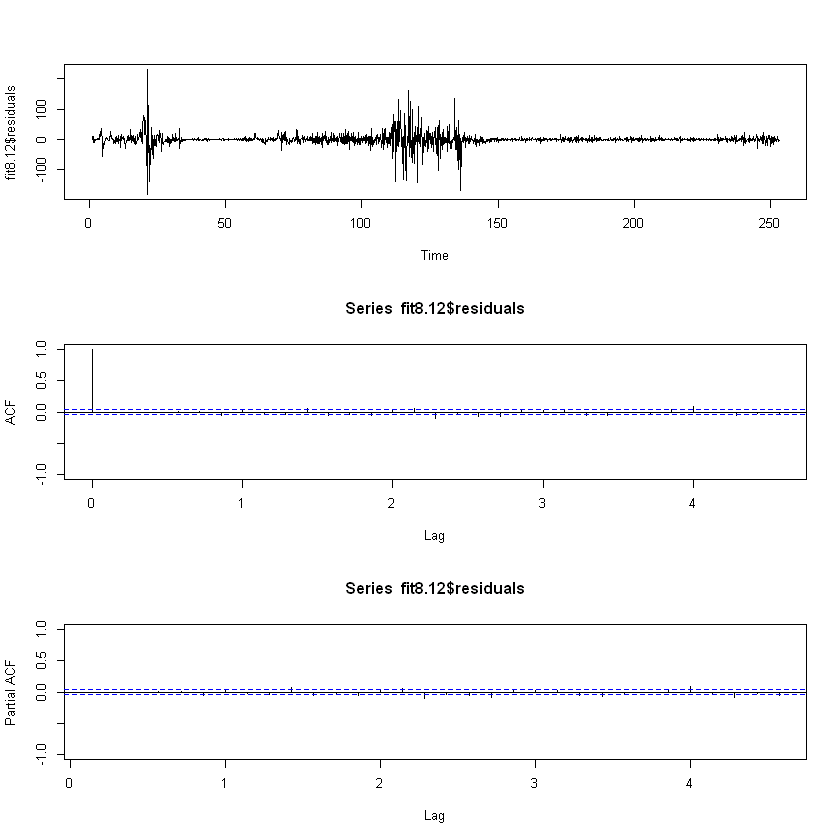

In [706]:
par(mfrow=c(3,1))
plot.ts(fit8.12$residuals)
acf(fit8.12$residuals,ylim=c(-1,1))
pacf(fit8.12$residuals,ylim=c(-1,1))

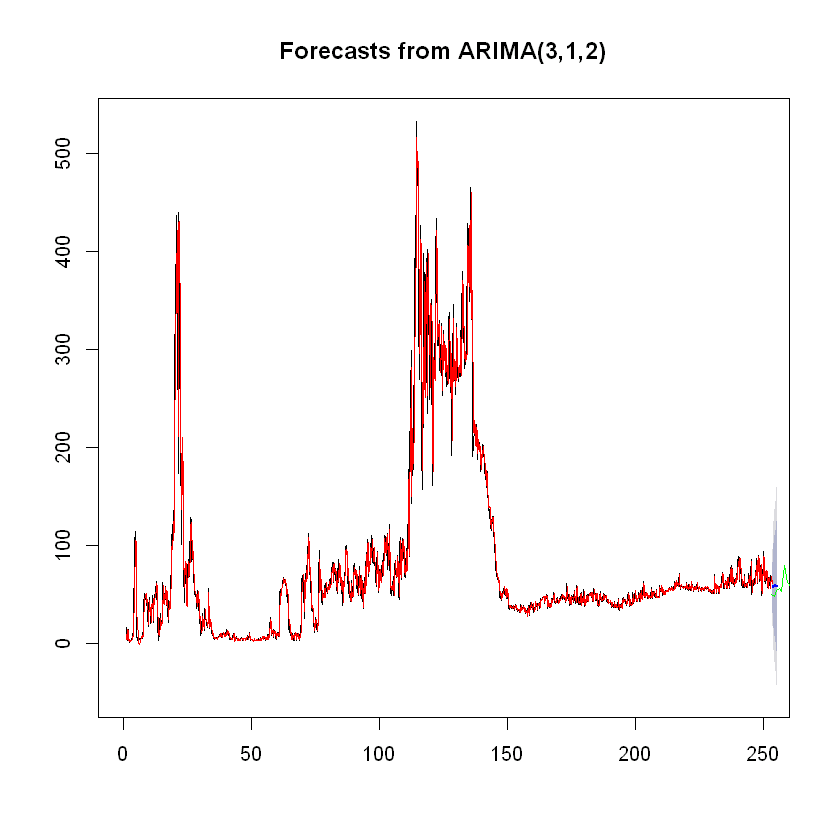

In [711]:
plot(forecast(fit8.12,h=longitud_pronostico),xlim=c(0,250))
lines(fitted(fit8.12),col="red")
lines(append(rep(NA,252),for8.1),col="green")

In [712]:
precision8.1<-accuracy(forecast(fit8.1,h=longitud_pronostico),for8.1)[,2] #RMSE mod1 SARIMA
precision8.12<-accuracy(forecast(fit8.12,h=longitud_pronostico),for8.1)[,2] #RMSE mod2 SARIMA

precision8.1
precision8.12

Training set     Test set 
   19.800685     7.165666

Training set     Test set 
   19.768423     6.967935

In [717]:
ordenes<-rbind(c("p","d","q","P","D","Q","S","RMSE_sample", "RMSE_for"),
               c(arimaorder(fit8.1),round(precision8.1[[1]],2),round(precision8.1[[2]],2)),
               c(c(arimaorder(fit8.12),0,0,0,0),round(precision8.12[[1]],2),round(precision8.12[[2]],2)))
resultados8.1<-cbind(c("","Muestra 8.1","Muestra 8.12"),ordenes)
resultados8.1

,p,d,q,P,D,Q,S,RMSE_sample,RMSE_for
Muestra 8.1,1,1,1,0,0,1,7,19.8,7.17
Muestra 8.12,3,1,2,0,0,0,0,19.77,6.97


In [721]:
#Grupo 2 Ventana de 8 años
f8.2<-ts(modelos8.fit$mod2,frequency = 7)

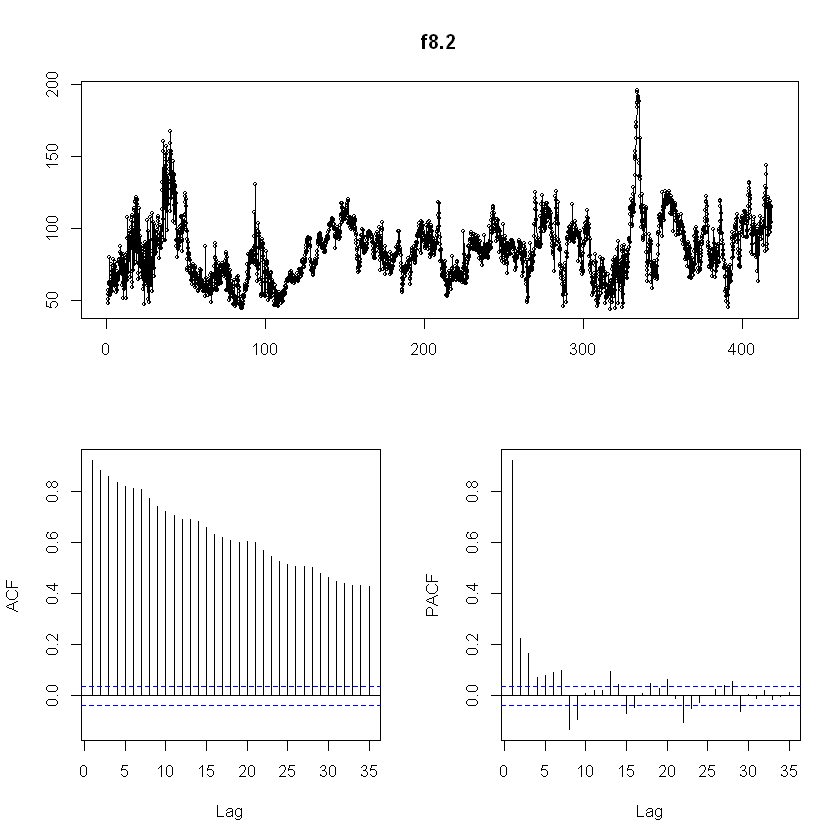

In [722]:
tsdisplay(f8.2)

In [726]:
#Pruebas de raices unitarias y raices unitarias estacionales

ndiffs(x = f8.2,alpha = 0.05,test = "adf",max.d=2) #Augmented Dickey Fuller Test
ndiffs(x = f8.2,alpha = 0.05,test = "kpss",max.d=2) #Kwiatkowski–Phillips–Schmidt–Shin Test
ndiffs(x = f8.2,alpha = 0.05,test = "pp",max.d=2) #Phillips–Perron Test
nsdiffs(x=f8.2,m=7,test="ch",max.D=1) # Canova-Hansen Test
nsdiffs(x=f8.2,m=7,test="ocsb",max.D=1) #OCSB Test

[1] 0

[1] 1

[1] 0

[1] 0

[1] 0

In [727]:
fit8.2<-auto.arima(f8.2)
arimaorder(fit8.2)
fit8.2$aicc

[1] 3 1 4 0 0 2 7

[1] 20182.37

In [729]:
fit8.21<-auto.arima(f8.2,stepwise = FALSE,approximation = FALSE)
arimaorder(fit8.21)
fit8.21$aicc

[1] 1 1 2 2 0 0 7

[1] 20170.27

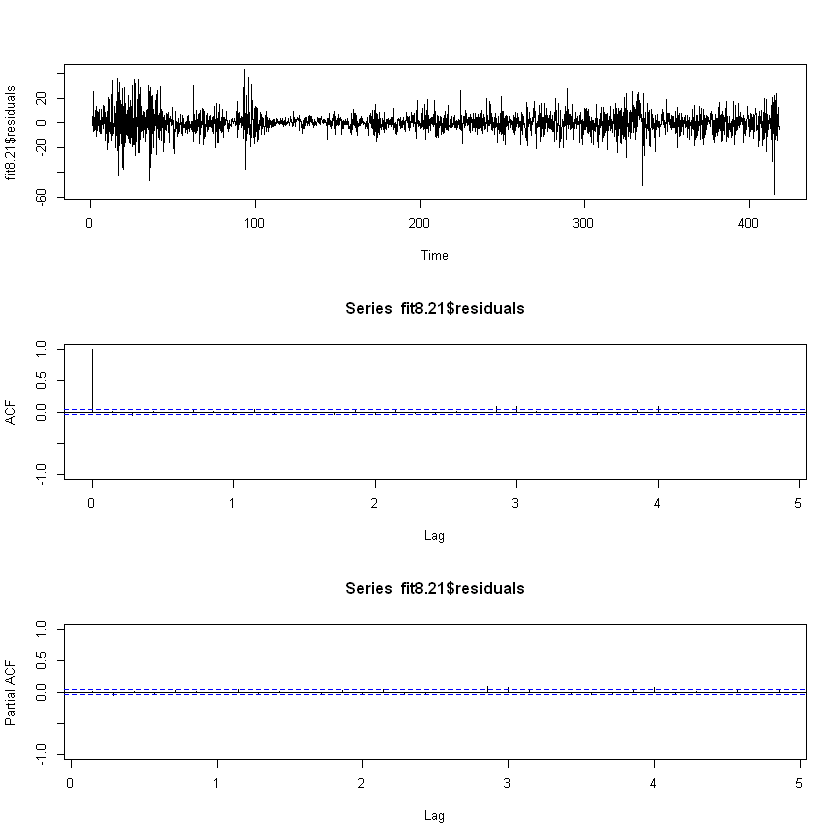

In [730]:
par(mfrow=c(3,1))
plot.ts(fit8.21$residuals)
acf(fit8.21$residuals,ylim=c(-1,1))
pacf(fit8.21$residuals,ylim=c(-1,1))

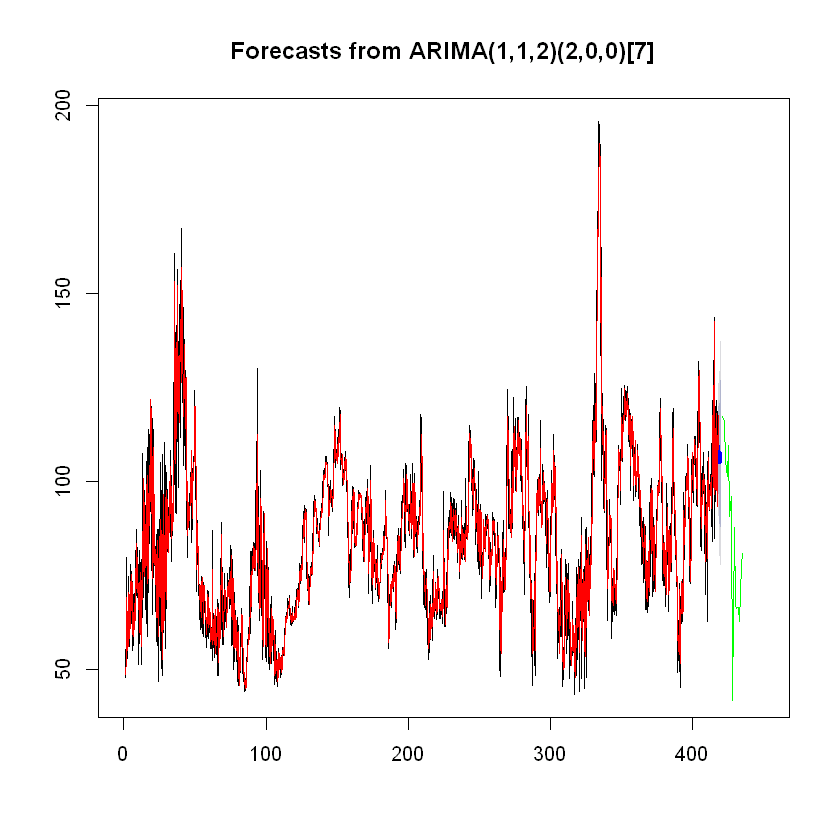

In [740]:
plot(forecast(fit8.21,h=longitud_pronostico),xlim=c(0,450))
lines(fitted(fit8.21),col="red")
lines(append(rep(NA,420),for8.2),col="green")

In [741]:
precision8.2<-accuracy(forecast(fit8.2,h=longitud_pronostico),for8.2)[,2] #RMSE mod1 SARIMA
precision8.21<-accuracy(forecast(fit8.21,h=longitud_pronostico),for8.2)[,2] #RMSE mod2 SARIMA

precision8.2
precision8.21

Training set     Test set 
     7.64768     31.64440

Training set     Test set 
    7.641903    29.961045

In [756]:
ordenes<-rbind(c("p","d","q","P","D","Q","S","RMSE_sample", "RMSE_for"),
               c(arimaorder(fit8.2),round(precision8.2[[1]],2),round(precision8.2[[2]],2)),
               c(arimaorder(fit8.21),round(precision8.21[[1]],2),round(precision8.21[[2]],2)))
resultados8.2<-cbind(c("","Muestra 8.2","Muestra 8.21"),ordenes)
resultados8.2

,p,d,q,P,D,Q,S,RMSE_sample,RMSE_for
Muestra 8.2,3,1,4,0,0,2,7,7.65,31.64
Muestra 8.21,1,1,2,2,0,0,7,7.64,29.96


In [743]:
#Grupo 3 Ventana de 8 años
f8.3<-ts(modelos8.fit$mod3,frequency = 7)

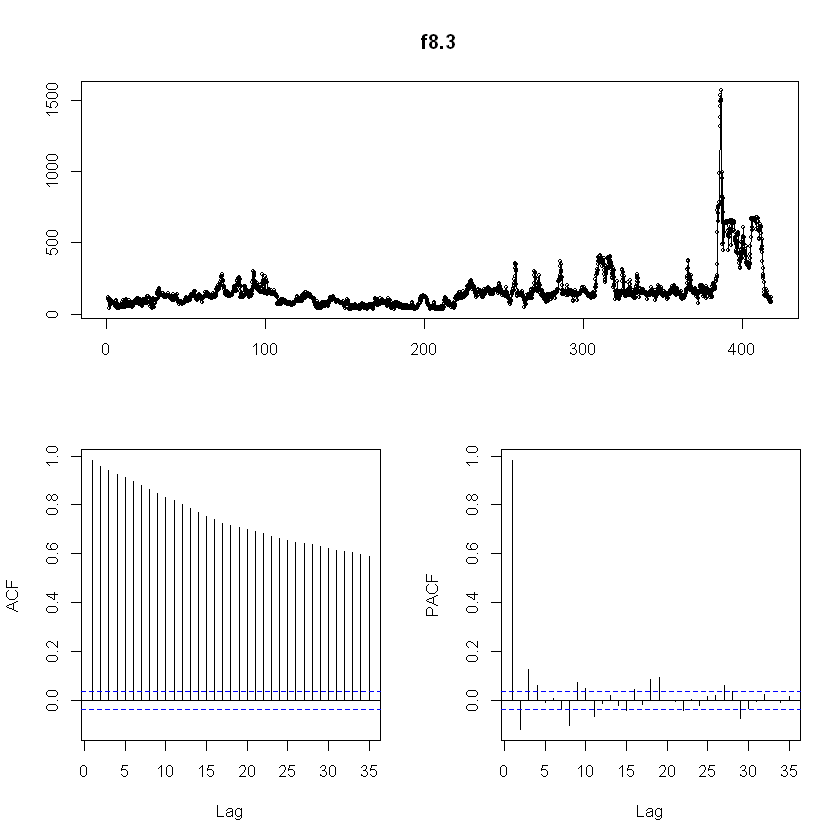

In [744]:
tsdisplay(f8.3)

In [747]:
#Pruebas de raices unitarias y raices unitarias estacionales

ndiffs(x = f8.3,alpha = 0.05,test = "adf",max.d=2) #Augmented Dickey Fuller Test
ndiffs(x = f8.3,alpha = 0.05,test = "kpss",max.d=2) #Kwiatkowski–Phillips–Schmidt–Shin Test
ndiffs(x = f8.3,alpha = 0.05,test = "pp",max.d=2) #Phillips–Perron Test
nsdiffs(x=f8.3,m=7,test="ch",max.D=2) # Canova-Hansen Test
nsdiffs(x=f8.3,m=7,test="ocsb",max.D=2) #OCSB Test

[1] 0

[1] 1

[1] 0

[1] 0

[1] 0

In [748]:
fit8.3<-auto.arima(f8.3)
arimaorder(fit8.3)
fit8.3$aicc

[1] 0 1 3 0 0 2 7

[1] 27654.91

In [749]:
fit8.31<-auto.arima(f8.3,stepwise=FALSE,approximation=FALSE)
arimaorder(fit8.31)
fit8.31$aicc

[1] 3 1 0 2 0 0 7

[1] 27652.52

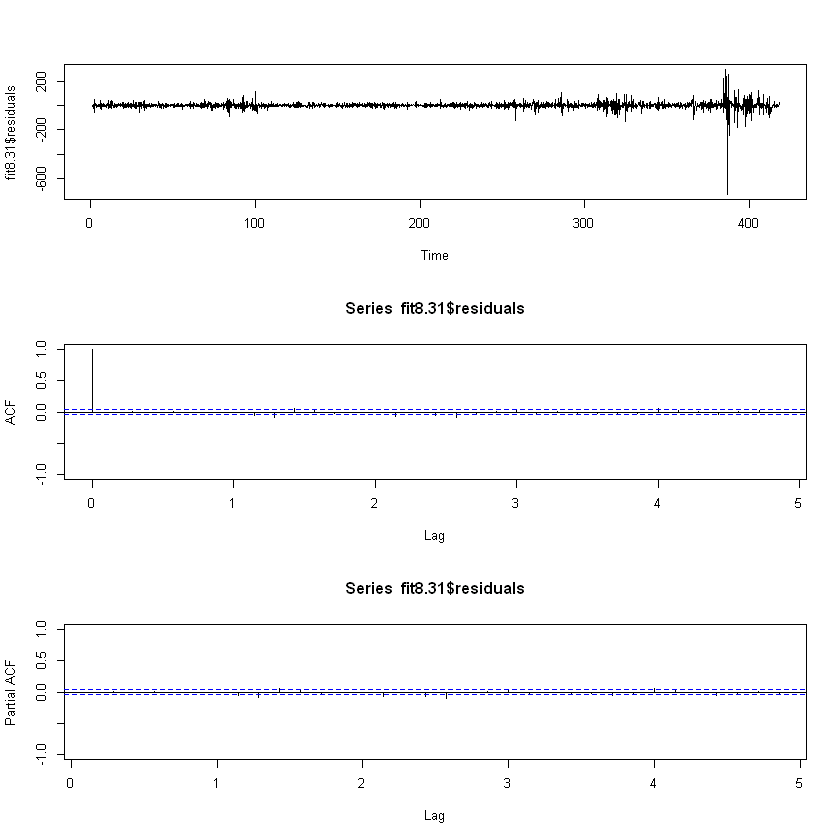

In [750]:
par(mfrow=c(3,1))
plot.ts(fit8.31$residuals)
acf(fit8.31$residuals,ylim=c(-1,1))
pacf(fit8.31$residuals,ylim=c(-1,1))

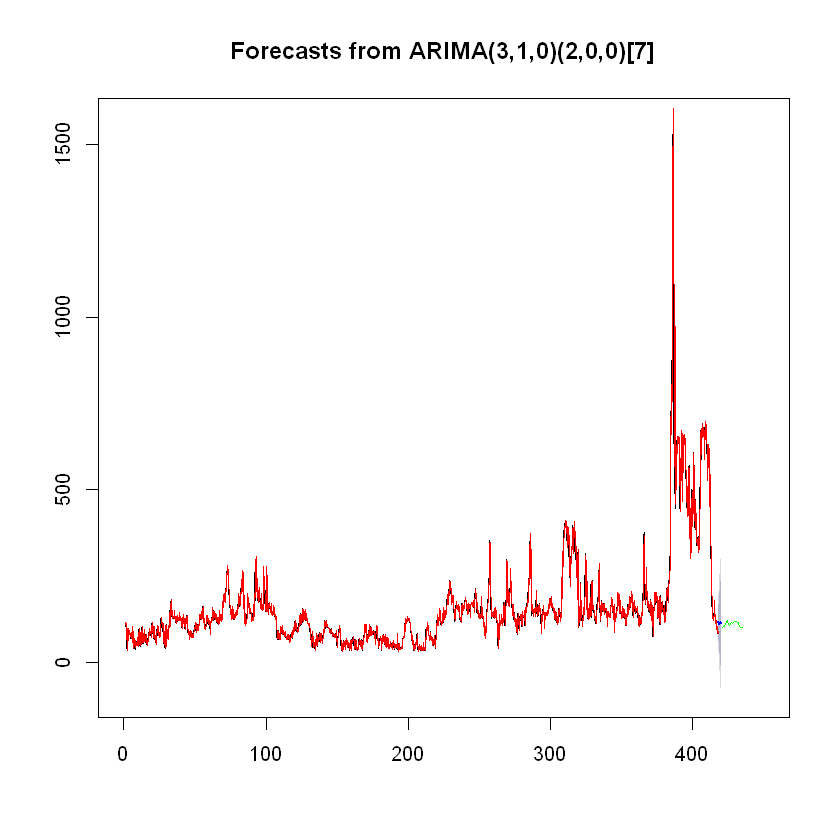

In [751]:
plot(forecast(fit8.31,h=longitud_pronostico),xlim=c(0,450))
lines(fitted(fit8.31),col="red")
lines(append(rep(NA,420),for8.3),col="green")

In [822]:
precision8.3<-accuracy(forecast(fit8.3,h=longitud_pronostico),for8.3)[,2] #RMSE mod1 SARIMA
precision8.31<-accuracy(forecast(fit8.31,h=longitud_pronostico),for8.3)[,2] #RMSE mod2 SARIMA

precision8.3
precision8.31

Training set     Test set 
   27.546026     9.170306

Training set     Test set 
   27.534704     9.213283

In [753]:
ordenes<-rbind(c("p","d","q","P","D","Q","S","RMSE_sample", "RMSE_for"),
               c(arimaorder(fit8.3),round(precision8.3[[1]],2),round(precision8.3[[2]],2)),
               c(arimaorder(fit8.31),round(precision8.31[[1]],2),round(precision8.31[[2]],2)))
resultados8.3<-cbind(c("","Muestra 8.3","Muestra 8.31"),ordenes)
resultados8.3

,p,d,q,P,D,Q,S,RMSE_sample,RMSE_for
Muestra 8.3,0,1,3,0,0,2,7,27.55,9.17
Muestra 8.31,3,1,0,2,0,0,7,27.53,9.21


In [757]:
rbind(resultados8.1,resultados8.2,resultados8.3)

,p,d,q,P,D,Q,S,RMSE_sample,RMSE_for
Muestra 8.1,1,1,1,0,0,1,7,19.8,7.17
Muestra 8.12,3,1,2,0,0,0,0,19.77,6.97
,p,d,q,P,D,Q,S,RMSE_sample,RMSE_for
Muestra 8.2,3,1,4,0,0,2,7,7.65,31.64
Muestra 8.21,1,1,2,2,0,0,7,7.64,29.96
,p,d,q,P,D,Q,S,RMSE_sample,RMSE_for
Muestra 8.3,0,1,3,0,0,2,7,27.55,9.17
Muestra 8.31,3,1,0,2,0,0,7,27.53,9.21


## Ventana de 12 años


In [767]:
#Se definen ventanas de 12 años para ajustar modelos
ventana<-12 #Tamaño de la ventana
longitud_ventana<-365*ventana
longitud_pronostico<-15
años<-1996:2016 #Total de años con datos
numero_modelos<-floor((length(años)/ventana)) # numero de modelos a construir
cola_datos<-length(constant_price)-longitud_ventana*(numero_modelos)-longitud_pronostico


modelos12.fit<-data.frame(mod1=c(rep(NA,longitud_ventana-cola_datos),constant_price[1:cola_datos]), # Modelo1
mod2=constant_price[(cola_datos+1):(cola_datos+longitud_ventana)])     # Modelo2
                        

for12.1<-constant_price[(cola_datos+1):(cola_datos+longitud_pronostico)]
for12.2<-constant_price[(cola_datos+longitud_ventana*1+1):(cola_datos+longitud_ventana*1+longitud_pronostico)]


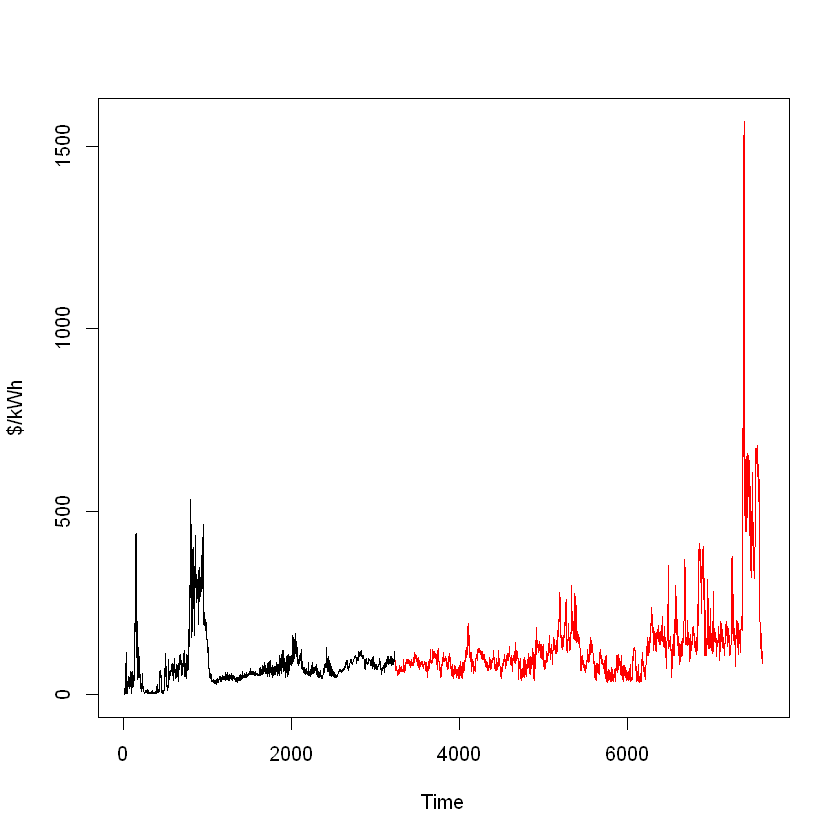

In [768]:
plot.ts(constant_price[1:cola_datos],xlim=c(0,length(constant_price)),ylim=c(0,max(constant_price)),ylab="$/kWh")
lines(append(rep(NA,cola_datos),modelos12.fit$mod2),col="red")

In [771]:
#Grupo 1 Ventana de 12 años
f12.1<-ts(constant_price[1:cola_datos],frequency = 7)

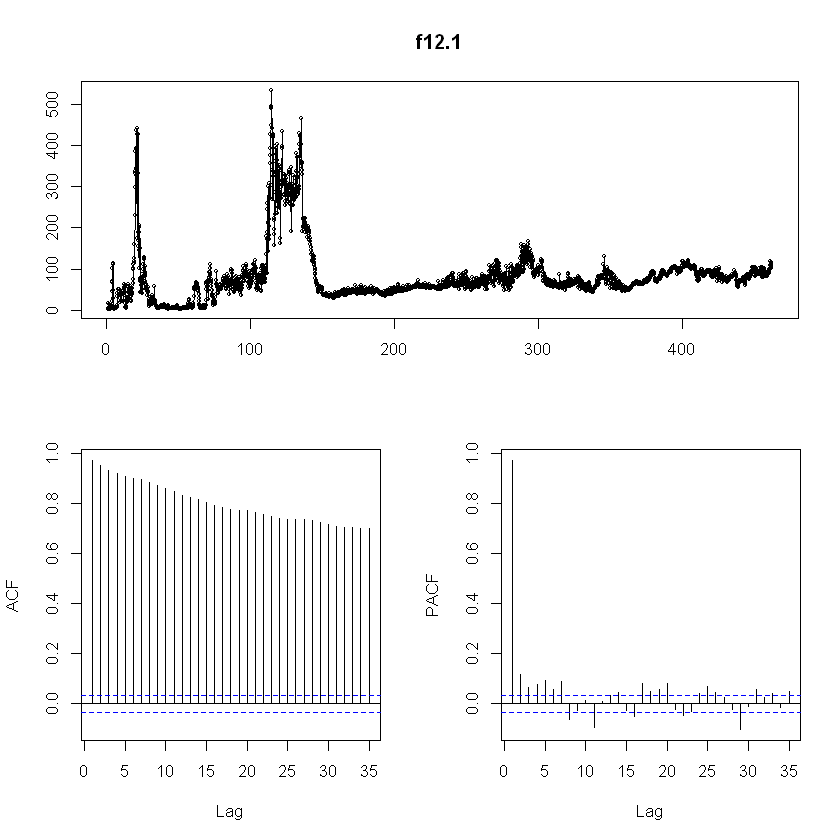

In [772]:
tsdisplay(f12.1)

In [773]:
#Pruebas de raices unitarias y raices unitarias estacionales

ndiffs(x = f12.1,alpha = 0.05,test = "adf",max.d=2) #Augmented Dickey Fuller Test
ndiffs(x = f12.1,alpha = 0.05,test = "kpss",max.d=2) #Kwiatkowski–Phillips–Schmidt–Shin Test
ndiffs(x = f12.1,alpha = 0.05,test = "pp",max.d=2) #Phillips–Perron Test
nsdiffs(x=f12.1,m=7,test="ch",max.D=1) # Canova-Hansen Test
nsdiffs(x=f12.1,m=7,test="ocsb",max.D=1) #OCSB Test

[1] 0

[1] 1

[1] 0

[1] 0

[1] 0

In [774]:
fit12.1<-auto.arima(f12.1)
arimaorder(fit12.1)
fit12.1$aicc

[1] 1 1 2 0 0 2 7

[1] 26925.75

In [775]:
fit12.12<-auto.arima(f12.1,stepwise = FALSE,approximation = FALSE)
arimaorder(fit12.12)
fit12.12$aicc

[1] 1 1 2 2 0 0 7

[1] 26923.35

In [776]:
fit12.13<-auto.arima(f12.1,stepwise = FALSE,approximation = FALSE,D=1)
arimaorder(fit12.13)
fit12.13$aicc

[1] 2 0 0 2 1 0 7

[1] 27518.96

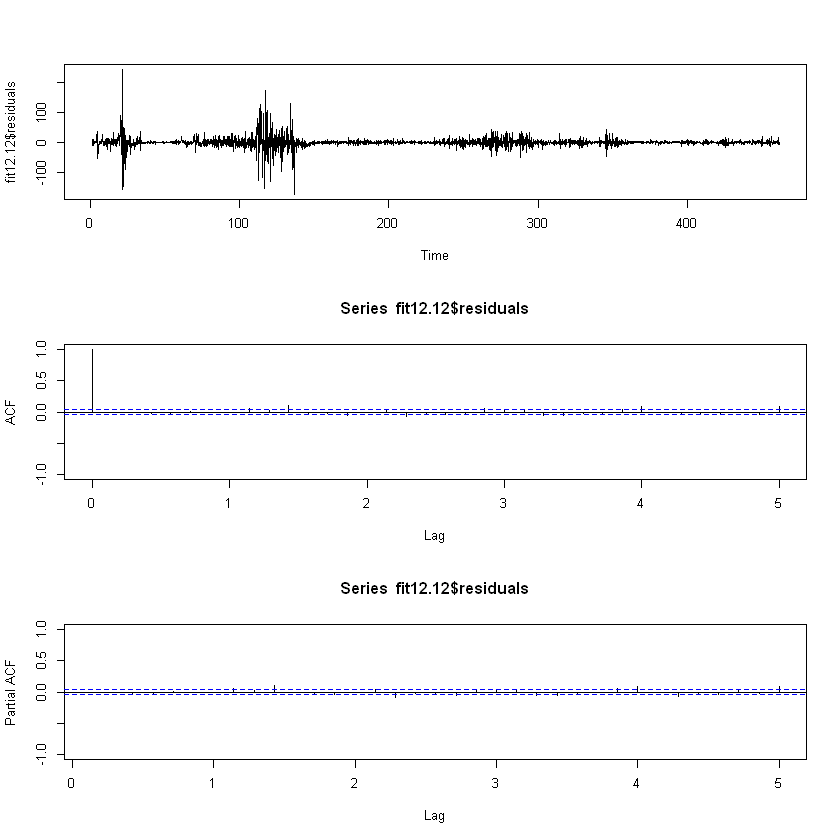

In [777]:
par(mfrow=c(3,1))
plot.ts(fit12.12$residuals)
acf(fit12.12$residuals,ylim=c(-1,1))
pacf(fit12.12$residuals,ylim=c(-1,1))

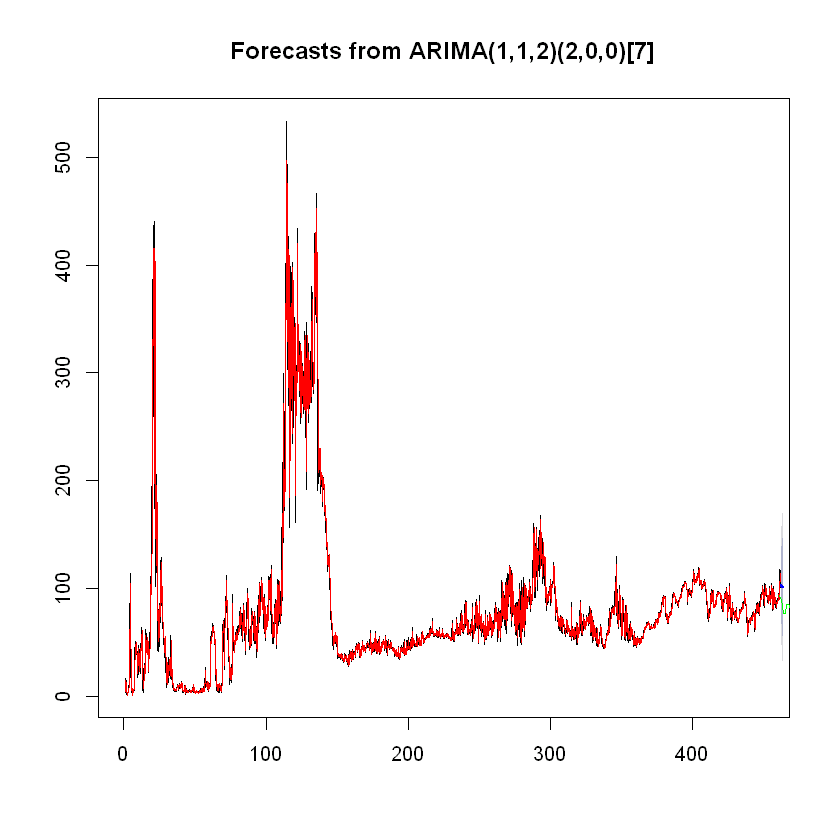

In [779]:
plot(forecast(fit12.12,h=longitud_pronostico),xlim=c(0,450))
lines(fitted(fit12.12),col="red")
lines(append(rep(NA,460),for12.1),col="green")

In [780]:
precision12.1<-accuracy(forecast(fit12.1,h=longitud_pronostico),for12.1)[,2] #RMSE mod1 SARIMA
precision12.12<-accuracy(forecast(fit12.12,h=longitud_pronostico),for12.1)[,2] #RMSE mod2 SARIMA
precision12.13<-accuracy(forecast(fit12.13,h=longitud_pronostico),for12.1)[,2] #RMSE mod2 SARIMA


precision12.1
precision12.12
precision12.13

Training set     Test set 
    15.67782     24.45022

Training set     Test set 
    15.67192     24.34372

Training set     Test set 
    17.30397     27.71346

In [781]:
ordenes<-rbind(c("p","d","q","P","D","Q","S","RMSE_sample", "RMSE_for"),
               c(arimaorder(fit12.1),round(precision12.1[[1]],2),round(precision12.1[[2]],2)),
               c(arimaorder(fit12.12),round(precision12.12[[1]],2),round(precision12.12[[2]],2)),
              c(arimaorder(fit12.13),round(precision12.13[[1]],2),round(precision12.13[[2]],2)))

resultados12.1<-cbind(c("","Muestra 12.1","Muestra 12.12","Muestra 12.13"),ordenes)
resultados12.1

,p,d,q,P,D,Q,S,RMSE_sample,RMSE_for
Muestra 12.1,1,1,2,0,0,2,7,15.68,24.45
Muestra 12.12,1,1,2,2,0,0,7,15.67,24.34
Muestra 12.13,2,0,0,2,1,0,7,17.3,27.71


In [782]:
#Grupo  2 Ventana de 12 años
f12.2<-ts(modelos12.fit$mod2,frequency = 7)

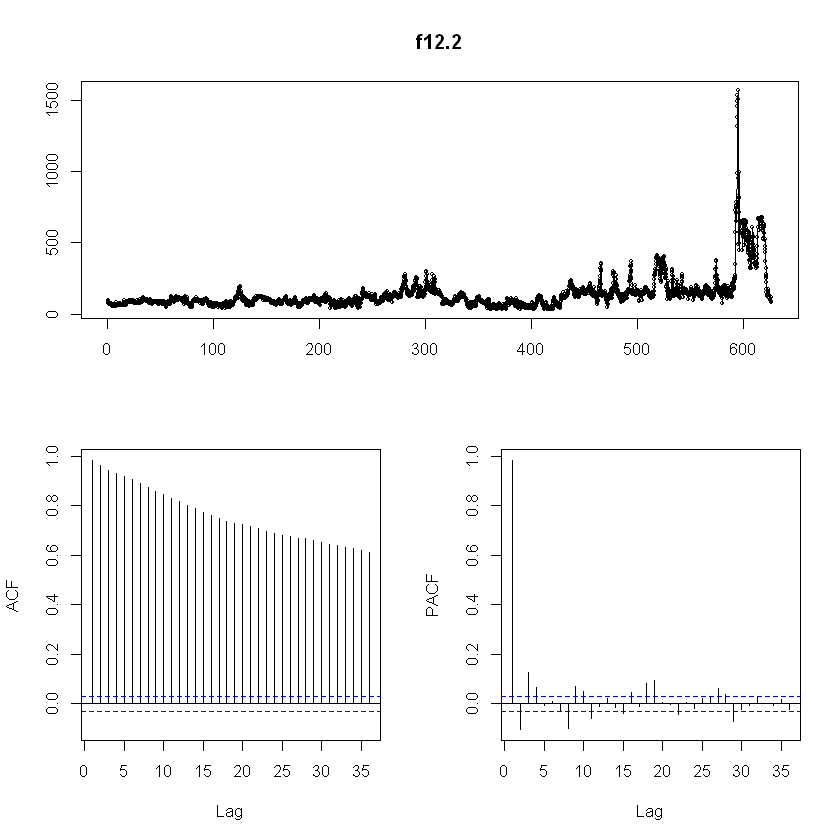

In [783]:
tsdisplay(f12.2)

In [784]:
#Pruebas de raices unitarias y raices unitarias estacionales

ndiffs(x = f12.2,alpha = 0.05,test = "adf",max.d=2) #Augmented Dickey Fuller Test
ndiffs(x = f12.2,alpha = 0.05,test = "kpss",max.d=2) #Kwiatkowski–Phillips–Schmidt–Shin Test
ndiffs(x = f12.2,alpha = 0.05,test = "pp",max.d=2) #Phillips–Perron Test
nsdiffs(x=f12.2,m=7,test="ch",max.D=1) # Canova-Hansen Test
nsdiffs(x=f12.2,m=7,test="ocsb",max.D=1) #OCSB Test

[1] 0

[1] 1

[1] 0

[1] 0

[1] 0

In [788]:
fit12.2<-auto.arima(f12.2)
arimaorder(fit12.2)
fit12.2$aicc

[1] 0 1 3 0 0 2 7

[1] 39884.29

In [785]:
fit12.21<-auto.arima(f12.2,stepwise = FALSE,approximation = FALSE)
arimaorder(fit12.21)
fit12.21$aicc

[1] 3 1 0 2 0 0 7

[1] 39880.81

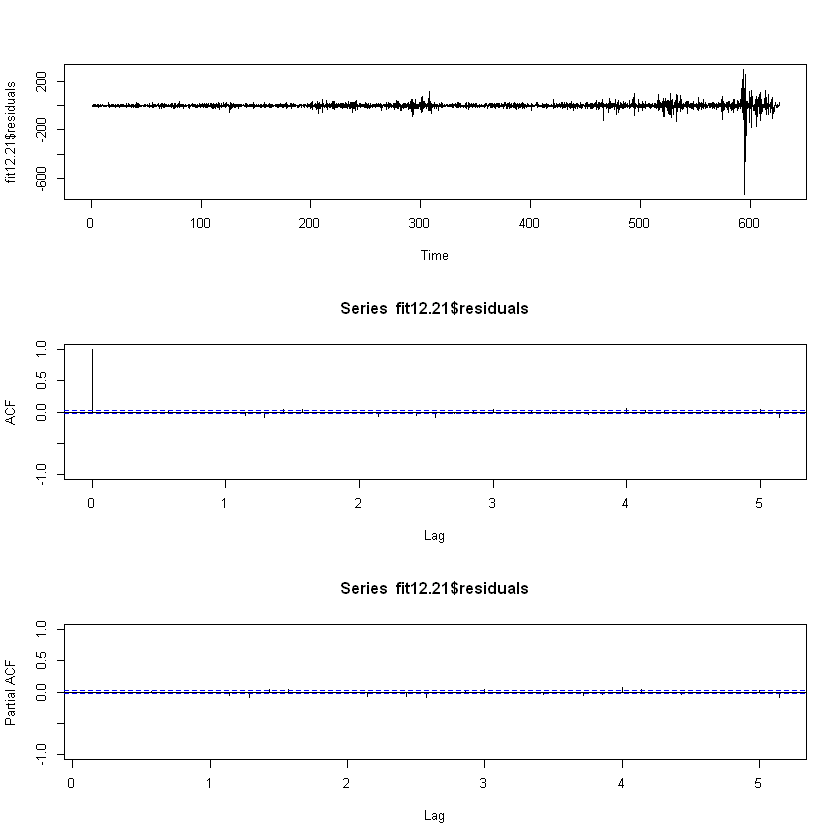

In [789]:
par(mfrow=c(3,1))
plot.ts(fit12.21$residuals)
acf(fit12.21$residuals,ylim=c(-1,1))
pacf(fit12.21$residuals,ylim=c(-1,1))

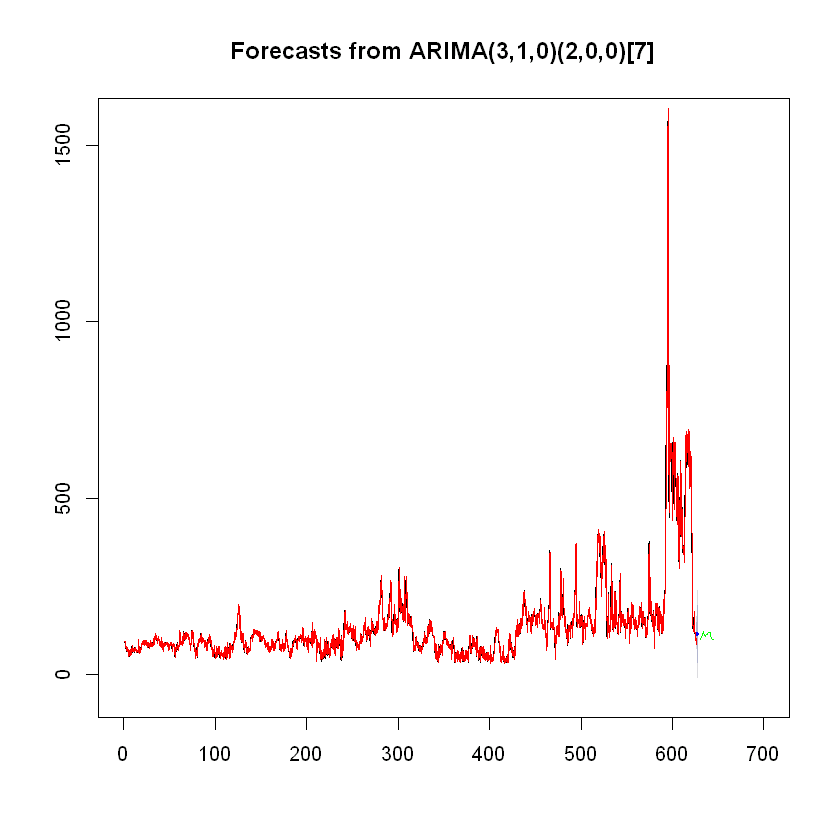

In [799]:
plot(forecast(fit12.21,h=longitud_pronostico),xlim=c(0,700))
lines(fitted(fit12.21),col="red")
lines(append(rep(NA,630),for12.2),col="green")

In [805]:
precision12.2<-accuracy(forecast(fit12.1,h=longitud_pronostico),for12.1)[,2] #RMSE mod1 SARIMA
precision12.21<-accuracy(forecast(fit12.12,h=longitud_pronostico),for12.1)[,2] #RMSE mod2 SARIMA



precision12.2
precision12.21


Training set     Test set 
    15.67782     24.45022

Training set     Test set 
    15.67192     24.34372

In [806]:
ordenes<-rbind(c("p","d","q","P","D","Q","S","RMSE_sample", "RMSE_for"),
               c(arimaorder(fit12.2),round(precision12.2[[1]],2),round(precision12.2[[2]],2)),
               c(arimaorder(fit12.21),round(precision12.21[[1]],2),round(precision12.21[[2]],2)))
            

resultados12.2<-cbind(c("","Muestra 12.1","Muestra 12.12"),ordenes)
resultados12.2

,p,d,q,P,D,Q,S,RMSE_sample,RMSE_for
Muestra 12.1,0,1,3,0,0,2,7,15.68,24.45
Muestra 12.12,3,1,0,2,0,0,7,15.67,24.34


In [808]:
rbind(resultados12.1,resultados12.2)

,p,d,q,P,D,Q,S,RMSE_sample,RMSE_for
Muestra 12.1,1,1,2,0,0,2,7,15.68,24.45
Muestra 12.12,1,1,2,2,0,0,7,15.67,24.34
Muestra 12.13,2,0,0,2,1,0,7,17.3,27.71
,p,d,q,P,D,Q,S,RMSE_sample,RMSE_for
Muestra 12.1,0,1,3,0,0,2,7,15.68,24.45
Muestra 12.12,3,1,0,2,0,0,7,15.67,24.34


# Resultados

In [809]:
resultados4.6

,p,d,q,P,D,Q,S,RMSE_sample,RMSE_for
Muestra 4.6,3,1,0,1,0,0,7,36.07,461.36
Muestra 4.62,0,1,3,0,0,1,7,36.07,460.75


In [813]:
resultados8.3

,p,d,q,P,D,Q,S,RMSE_sample,RMSE_for
Muestra 8.3,0,1,3,0,0,2,7,27.55,9.17
Muestra 8.31,3,1,0,2,0,0,7,27.53,9.21


In [811]:
resultados12.2

,p,d,q,P,D,Q,S,RMSE_sample,RMSE_for
Muestra 12.1,0,1,3,0,0,2,7,15.68,24.45
Muestra 12.12,3,1,0,2,0,0,7,15.67,24.34


## Resultados de la ventanas

Vimos que la ventana de 8 y 12 años, ajustan un modelo similar.

En el modelo de 8 años, se obtiene un mayor RMSE dentro de la muestra, sin embargo a la hora de pronsoticar por fuera de la muestra se obtiene un mejor ajuste. Por esta razon continuaremos trabajando con dicha ventana

# Validacion de transformaciones para mejorar el ajuste del modelo

# Transformaciones Box-Cox

En algunos casos, para poder comenzar a realizar estimaciones de modelos, debemos garantizar que los datos siguen una N$\sim(\mu,\sigma^2)$. 

Por esta razon se utilizan transformaciones para garantizar este supuesto:

El objetivo principal de la transformacion es estimar un valor de $\lambda$ para elevar los datos a dicha potencia.

La forma primaria de la transformacion es:

$Y^{(\lambda)}=\frac{y^\lambda-1}{\lambda}, si \lambda<>0$


$Y^{(\lambda)}=\log{y}, si  \lambda=0$

Se puede demostrar mediante L'Hopital que $Lim\frac{y^\lambda-1}{\lambda}=\log{y}$

## $\sqrt{P_t}$

In [827]:
cuadrado.fit8.31<-auto.arima(f8.3,stepwise=FALSE,approximation=FALSE,lambda = 0.5)
arimaorder(cuadrado.fit8.31)
cuadrado.fit8.31$aicc

[1] 1 1 1 2 0 0 7

[1] 10835.27

In [828]:
cuadrado.precision8.31<-accuracy(forecast(cuadrado.fit8.31,h=longitud_pronostico),for8.3)[,2] #RMSE mod1 SARIMA
cuadrado.precision8.31

Training set     Test set 
    27.99709     49.55315

## $\sqrt[3]{P_t}$

In [829]:
cub.fit8.31<-auto.arima(f8.3,stepwise=FALSE,approximation=FALSE,lambda = 0.3)
arimaorder(cub.fit8.31)
cub.fit8.31$aicc

[1] 2 1 1 2 0 0 7

[1] 4738.93

In [830]:
cub.precision8.31<-accuracy(forecast(cub.fit8.31,h=longitud_pronostico),for8.3)[,2] #RMSE mod1 SARIMA
cub.precision8.31

Training set     Test set 
    28.33084     40.47440

#$P_t^2$

In [832]:
BoxCox.lambda(constant_price)

[1] 0.2202664

#$P_t^3$

# $\frac{1}{P_t}$

# Automatico con el metodo de Guerrero

In [833]:
automatic.fit8.31<-auto.arima(f8.3,stepwise=FALSE,approximation=FALSE,lambda = BoxCox.lambda(constant_price))
arimaorder(automatic.fit8.31)
automatic.fit8.31$aicc

[1] 2 1 1 2 0 0 7

[1] 2397.584

In [ ]:
automatic.precision8.31<-accuracy(forecast(automatic.fit8.31,h=longitud_pronostico),for8.3)[,2] #RMSE mod1 SARIMA
automatic.precision8.31